#Import Libraries 🚩

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import metrics

from scipy.stats.contingency import association
from tabulate import tabulate
from scipy.stats import chi2_contingency
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
  LabelEncoder,
  OneHotEncoder,
  OrdinalEncoder,
)

import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Load Dataset ⏲️

In [ ]:
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/Data Science Abieezzz/Classification Bank Churn Prediction/Dataset/bank_churn_data.csv')
df.head()

**Dataset Description:**

Dataset terdiri dari 10.127 samples, dimana 20 features and 1 target boolean variabel `"attrition_flag"`

**Customer Identify & Status**
- `user_id` - customer account number, digunakan untuk membedakan satu nasabah dengan nasabah yang lain.
- `attrition_flag` **(Target)** - Menunjukkan Status keberlangsungan Nasabah, terdiri dari 2 nilai:

    - *Existing Customer* -> Nasabah yang masih aktif (no Churn)
    - *Attrited Customer* -> Nasabah telah berhenti menggunakan layanan (Churn)

**Demographic Information**
- `customer_age` - umur nasabah
- `gender` - jenis kelamin nasabah
- `dependent_count` - jumlah tanggungan individual nasabah
- `education_level` - pendidikan terakhir nasabah
- `marital_status` - status pernikahan nasabah
- `income_category` - income pendapatan tahunan nasabah

**Product Information & Relation Bank**
- `card_category` - jenis kartu yang digunakan nasabah
- `months_on_book` - sudah berapa lama nasabah terdaftar (satuan bulan)
- `total_relationship_count` - total produk perbankan yang digunakan nasabah

**Customer activities & Interactions**
- `months_inactive_12_mon` - jumlah bulan nasabah tidak melakukan aktifitas transaksi dalam 12 bulan terakhir
- `contacts_count_12_mon` - jumlah interaksi antara nasabah dan pihak bank dalam 12 bulan terakhir

**Credit & Balance**
- `credit_limit` - batas maksimum kredit yang diberikan bank kepada nasabah
- `total_revolving_bal` - total saldo kredit yang sudah digunakan nasabah
- `avg_open_to_buy` - sisa kredit yang masih bisa digunakan nasabah
- `avg_utilization_ratio` - rasio penggunaan kredit

**Transaction Activity**
- `total_trans_amt` - total nominal nilai transaksi nasabah dalam 12 bulan terakhir
- `total_trans_ct` - jumlah transaksi yang dilakukan nasabah dalam 12 bulan terakhir
- `total_amt_chng_q4_q1` - perubahan total nominal transaksi antara kuartal 4 dan kuartal 1
- `total_ct_chng_q4_q1` - Perubahan jumlah transaksi antara kuartal 4 dan kuartal 1

#Data Understanding💡

##Explore Datasets 📌

### Basic Dataset Information


In [ ]:
print("Shape of Data:", df.shape)
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

In [ ]:
df.columns

In [ ]:
df.info()

**Observations:**
- Dataset memiliki `21 columns` dan `10127 rows`
- Terdapat 3 jenis tipe data yaitu : `int64, float64 dan object`
- Sejauh ini belum ada kolom yang memiliki missing values

### Checking Duplicate Rows

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

In [ ]:
df.duplicated().sum()

**Observations:**
- Dataset ini tidak memiliki duplikat

### Checking Missing Values

In [ ]:
df.isna().sum()

In [ ]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette= ["green", "red"]

)
dms.set_yticklabels(size=6)

**Observations:**
- kita bisa validasi bahwa memang dataset ini tidak mempunyai missing values

### Division by Type of Data

In [ ]:
df.head()

**List of Column Types**
- **Categorical** (7 columns):
  - `user_id, gender, marital_status` - Nominal
  - `education_level, card_category, income_category` - Ordinal
  - `attrition_flag` - Nominal (binary 0 & 1)

- **Numerical** (14 columns):
  - `customer_age, dependent_count, months_on_book, total_relationship_count, months_inactive_12_mon, contacts_count_12_mon, credit_limit, total_revolving_bal, avg_open_to_buy, total_amt_chng_q4_q1, total_trans_amt, total_trans_ct, total_ct_chng_q4_q1, avg_utilization_ratio`

In [ ]:
cat_cols = ['user_id', 'gender',
            'marital_status', 'education_level',
            'card_category', 'income_category',
            'attrition_flag']

num_cols = ['customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count',
            'months_inactive_12_mon', 'contacts_count_12_mon',
            'credit_limit', 'total_revolving_bal', 'avg_open_to_buy',
            'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
            'total_ct_chng_q4_q1', 'avg_utilization_ratio']

##Data Types Information 📌

In [ ]:
print("Data Type Before Correction:\n")
df.info()

**Change the some column data types**


Mengubah tipe data categorical ke `category`, agar dalam melakukan explorasi dan insight tidak dianggap sebagai numerical

In [ ]:
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
print("Data Types after Correction:\n")
df.info()

##Statistical Summary 📌

### Numerical Features

In [ ]:
print("The number of numerical features is {}".format(len(num_cols)))

df[num_cols].describe()

**Observations:**
- usia nasabah di rentang dewasa produktif sampai lansia awal dengan rata-rata dan median di umur 46 tahun yang menandakan distribusi normal.
- tanggungan nasabah paling banyak memiliki 5 tanggungan dengan rata-rata memiliki 2 tanggungan hal ini menandakan demografis yang normal.
- dilihat dari rata-rata nasabah sudah menjadi pelanggan kurang lebih selama 36 bulan atau 3 tahun
- nasabah menggunakan product/layanan yang diberikan dengan median 4 product artinya cukup aktif untuk dikatakan menggunakan layanan yang diberikan
- rata-rata nasabah tidak aktif selama 2 bulan bisa dikatakan secara keseluruhan masih di terima atau tidak nonaktif secara ekstreem
- rata-rata nasabah menghubungi bank sekitar 2-3 kali setiap tahun artinya tidak menghubungi terlalu sering atau hanya memang jika dibutuhkan
- limit nasabah memiliki variasi yang tinggi karena memang dilandaskan atas dasar pendapatan, riwayat, jenis kartu dll
- hal ini menarik karna ada nasabah yang tidak menggunakan kreditnya atau 0 jumlah saldo kredit yang dipakai

Secara keseluruhan variabel numerik memiliki rentang yang wajar

### Categorical Features

In [ ]:
print("The number of categorical features is {}".format(len(cat_cols)))

In [ ]:
for column in cat_cols:
    print(f"Column {column}")
    print(df[column].value_counts())
    print("="*20, "\n")

**Observations:**
- `user_id` semuanya hanya muncul sekali, sehingga dapat dikatakan tidak ada duplicate pada data atau nilai unik
- proporsi `gender` relatif seimbang
- `marital status` mayoritas nasabah didominasi oleh yang sudah menikah dan terdapat nasabah yang tidak diketahui status sosial nya `unknown` sebanyak 749 nasabah
- `Education` didominasi atau mayoritas `Graduate` sebanyak 3128 nasabah dan terdapat nasabah yang tidak diketahui tingkat pendidikan dan cukup besar nilainya sebesar 1519 nasabah
- `card category` mayoritas nasabah memiliki jenis kartu `Blue` yang paling rendah sebanyak 9436 dan nilainya sangat besar dibandingkan yang lain
- `income category` nasabah paling banyak didominasi oleh income dibawah 40k dan terdapat nasabah yaang tidak masul dalam kategori manapun atau `unknown` sebanyak 1112
- target yang dimiliki pada kolom `attrition flag` atau status nasabah masih aktif dalam layanan atau tidak memiliki ketimpangan yang cukup tinggi (Imbalanced Data),
  - yang masih aktif = 8500 nasabah
  - yang sudah berhenti layanan = 1627 nasabah

**Hal yang harus dilakukan saat Data Pre-processing adalah:**
- kolom seperti `user id` yang pasti tidak akan dimasukkan dalam proses classification sehingga bisa dilakukan drop column atau kolom `user id` dijadikan index
- kategori `unknown` yang muncul dalam kolom seperti `education_level, marital_status, income category` diperlakukan sebagai kategori terpisah selama proses pre-processing untuk menghindari asumsi yang tidak berdasar dan memungkinkan model mempelajari pengaruh ketidaktersediaan informasi terhadap kemungkinan nasabah berhenti (churn)
- akan dilakukan proses Feature Encoding untuk proses modelling pada kolom-kolom kategorikal
- pada kolom `attrition flag` memiliki sebaran yang timpang pada target, sehingga bisa menyebabkan proses Machine Learning gagal atau kurang optimal. Oleh karena itu, perlu dilakukan `Sampling Data (UnderSampling/OverSampling/Combinded/SMOTE/dll)`  

#Exploratory Data Analysis (EDA) 🧭

In [ ]:
# untuk menjaga kualitas data asli
df_eda = df.copy()

## Distribution Data

### Numerical

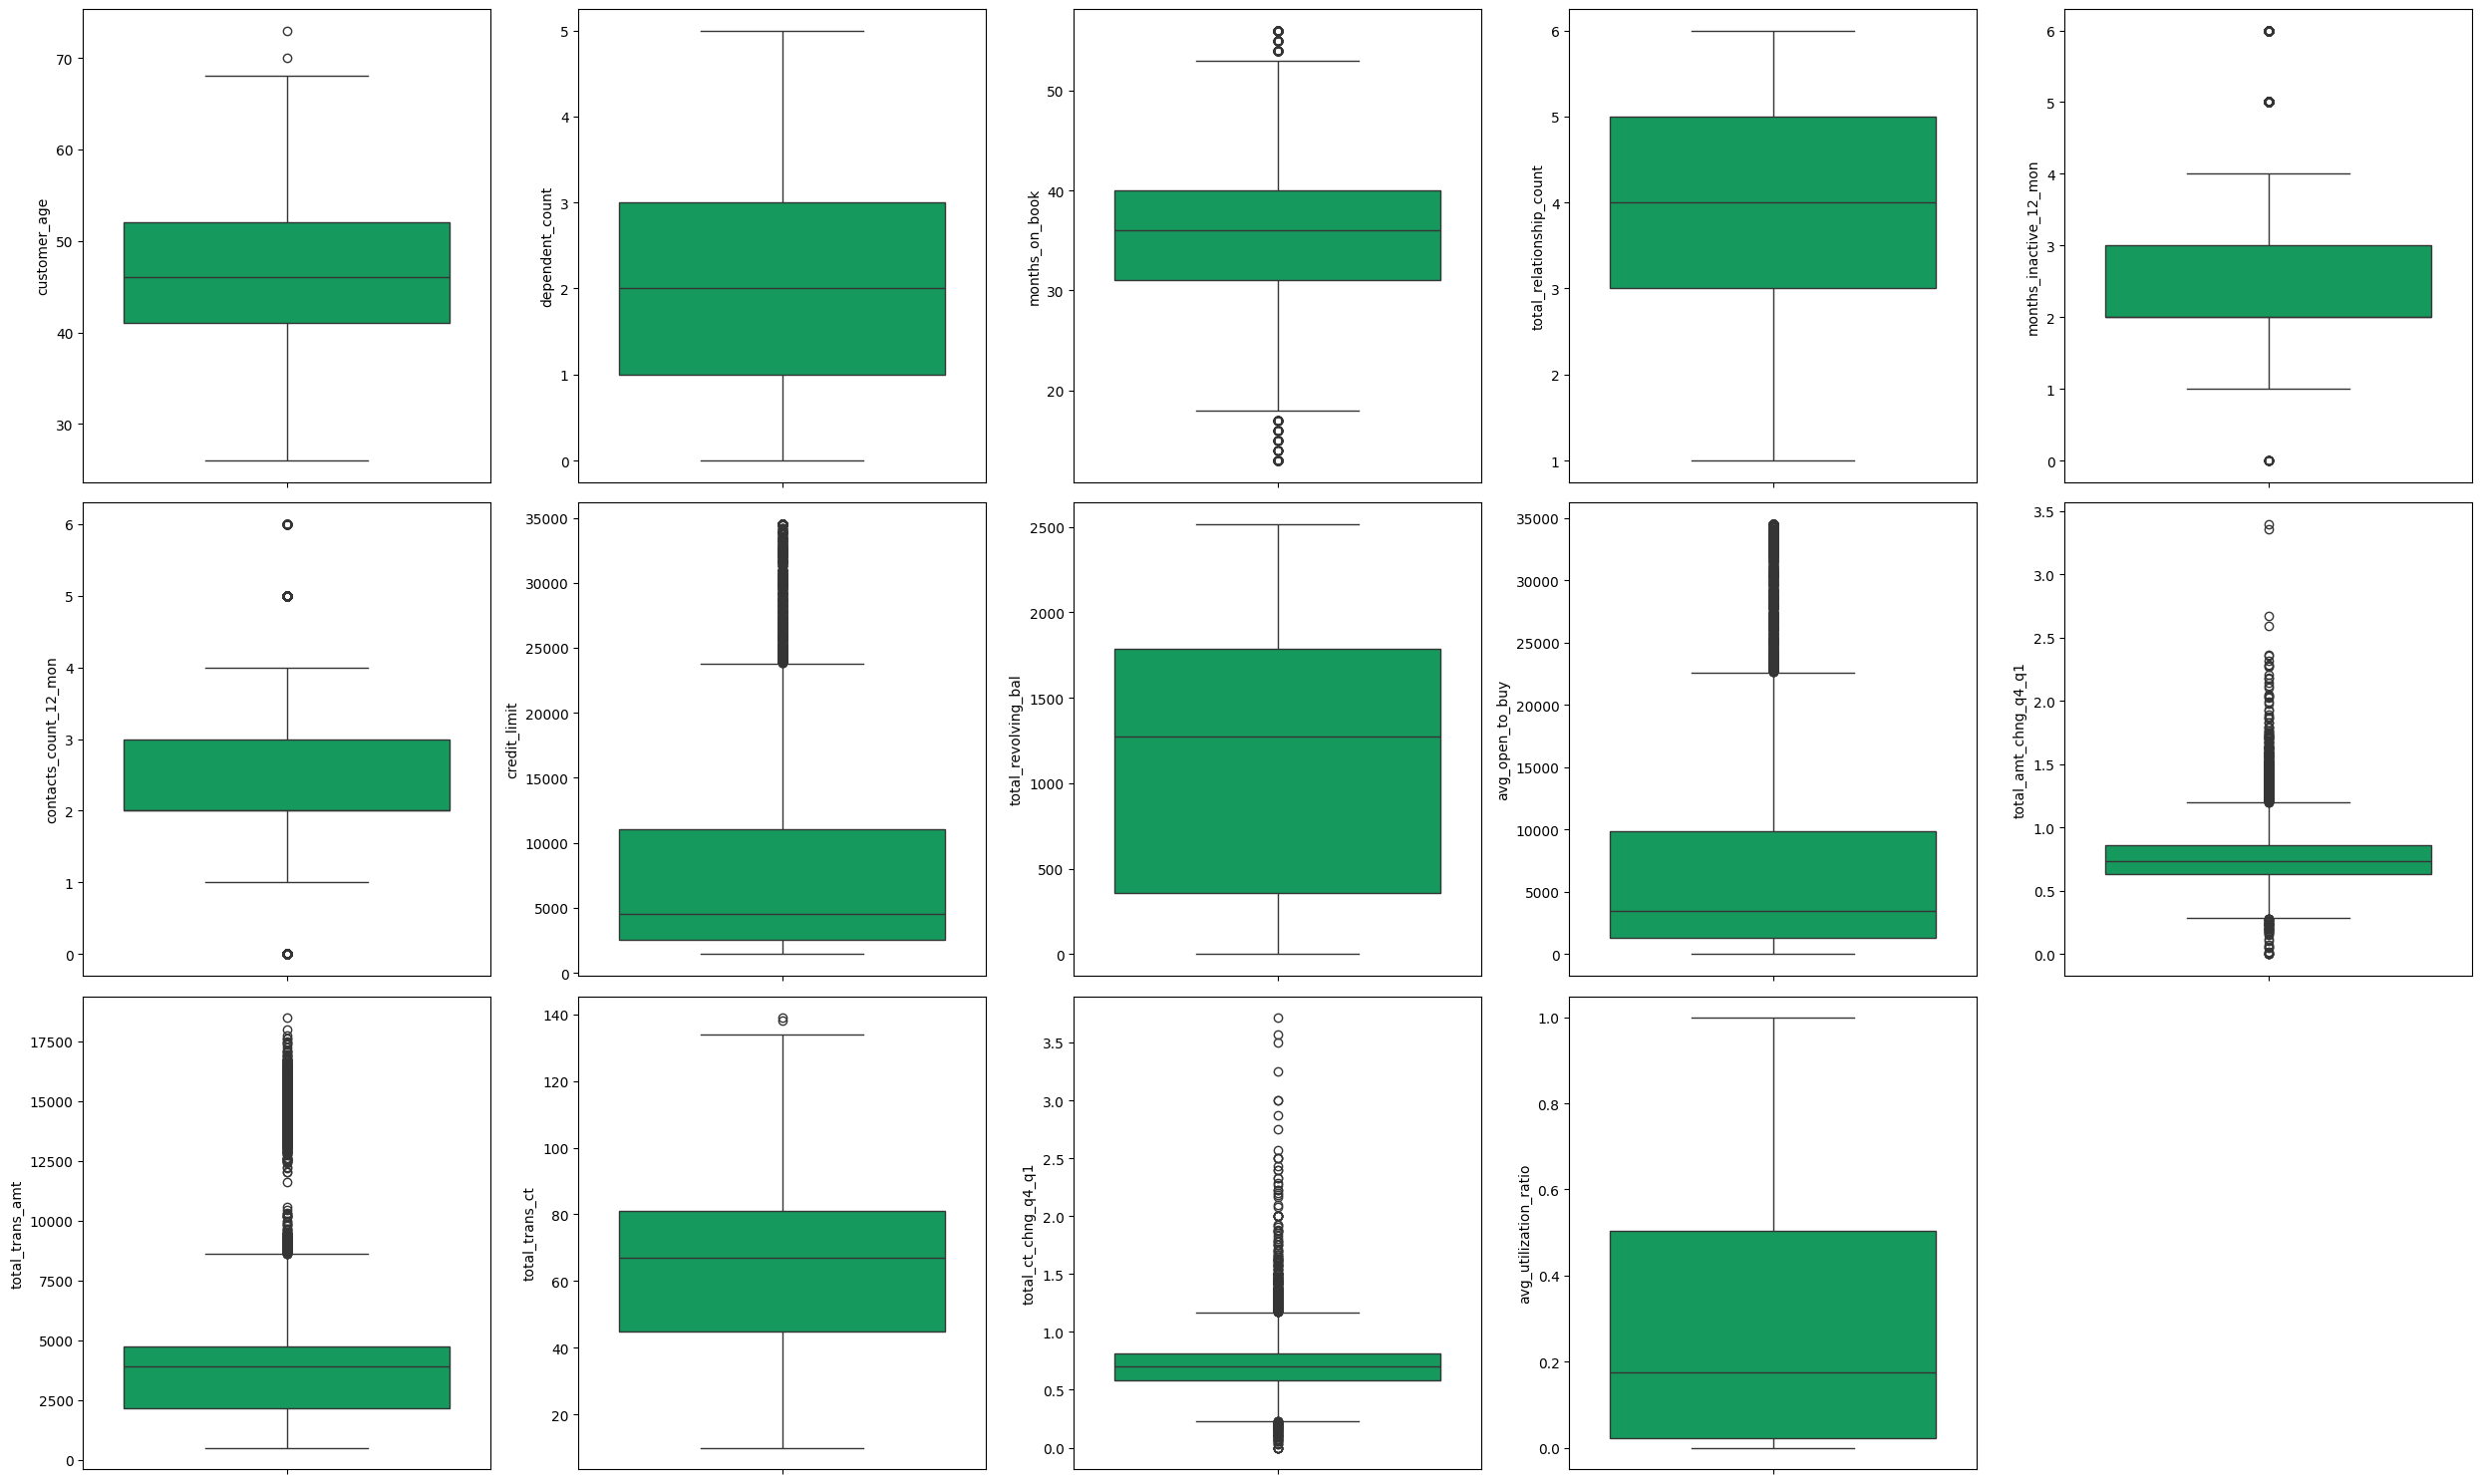

In [ ]:
plt.figure(figsize=(25,15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df_eda[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

**Checking Outlier**

In [ ]:
print(f'Number of Rows: {len(df_eda)}')
outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filltered_entries = np.array([True] * len(df_eda))
for col in num_cols:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df_eda[col] >= low_limit) & (df_eda[col] <= high_limit))
    outlier.append(len(df_eda[~filter_outlier]))
    no_outlier.append(len(df_eda[filter_outlier]))
    is_outlier.append(df_eda[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df_eda[col] >= low_limit) & (df_eda[col] <= high_limit)) & filltered_entries

print("Outlier All Data:", len(df_eda[~filtered_entries]))
print("Not Outlier All Data:", len(df_eda[filtered_entries]))

pd.DataFrame({
    "Column name": num_cols,
    "is Outlier": is_outlier,
    "Lower limit": low_lim,
    "Upper limit": high_lim,
    "Outlier": outlier,
    "Not Outlier": no_outlier
})

Number of Rows: 10127
Outlier All Data: 0
Not Outlier All Data: 10127


,Column name,is Outlier,Lower limit,Upper limit,Outlier,Not Outlier
0,customer_age,True,24.500,68.500,2,10125
1,dependent_count,False,-2.000,6.000,0,10127
2,months_on_book,True,17.500,53.500,386,9741
3,total_relationship_count,False,0.000,8.000,0,10127
4,months_inactive_12_mon,True,0.500,4.500,331,9796
5,contacts_count_12_mon,True,0.500,4.500,629,9498
6,credit_limit,True,-10213.750,23836.250,984,9143
7,total_revolving_bal,False,-1778.500,3921.500,0,10127
8,avg_open_to_buy,True,-11477.250,22660.750,963,9164
9,total_amt_chng_q4_q1,True,0.289,1.201,395,9732


**Observations:**

Berdasarkan identify outlier menggunakan metode **IQR** Terdapat Outlier pada kolom `customer age, months_on_book, months_inactive_12_mon, contacts_count_12_mon, total_trans_ct, credit_limit, avg_open_to_buy, total_trans_amt, total_amt_chng_q4_q1, dan total_ct_chng_q4_q1`
- Sebagian variabel teridentifikasi memiliki outlier secara statistik, khususnya pada variabel yang berkaitan dengan durusi hubungan, aktivitas nasabah, serta nilai transaksi dan kredit
- Variabel demografis relatif stabil, di mana `customer_age` hanya memiliki 2 observasi outlier yang masih berada dalam rentang usia yang wajar secara bisnis, sedangkan `dependent_count` tidak memiliki outlier sama sekali
- Variabel durasi hubungan dan aktivitas nasabah menunjukkan jumlah outlier yang cukup signifikan, seperti pada `months_on_book`, `months_inactive_12_mon`, dan `contacts_count_12_mon`. Outlier pada variabel ini mencerminkan variasi perilaku nasabah yang valid, misalnya nasabah dengan masa hubungan yang sangat lama atau tingkat inaktivitas yang tinggi.
- Variabel terkait kredit dan transaksi memiliki jumlah outlier yang relatif besar, terutama pada `credit_limit`, `avg_open_to_buy`, dan `total_trans_amt`. Hal ini menunjukkan adanya perbedaan yang cukup ekstrem antara nasabah dengan nilai ekonomi rendah dan nasabah bernilai tinggi.
- Tidak ditemukan outlier yang melanggar batasan logis atau definisi konsep variabel, seperti nilai negatif yang tidak realistis atau rasio yang melebihi batas konseptual.

Secara keseluruhan, outlier yang teridentifikasi lebih mencerminkan variasi alami karakteristik dan perilaku nasabah. Oleh karena itu penanganan outlier perlu dilakukan secara konstektual pada tahap pemodelan

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(data=df_eda[num_cols[i]], kde=True, color='#00af5f')
    plt.tight_layout()

In [ ]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df_eda[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

dist

**Observation**
- 7 dari 14 fitur berdistribusi `normal`, seperti `customer_age, dependent_count, months_on_book, total_relationship_count, contacts_count_12_mon, total_revolving_bal, total_trans_ct`.Hal ini ditunjukkan oleh nilai skewness yang mendekati nol dan bentuk histogram yang relatif simetris.
- 2 varibel seperti `months_inactive_12_mon` dan `avg_utilization_ratio` terlihat berdistribusi `skewed positif`. Distribusi ini menunjukkan bahwa sebagian besar nasabah berada pada nilai rendah, dengan ekor panjang ke arah nilai yang lebih tinggi.
- variabel terkait kredit dan transaksi seperti `credit_limit, avg_open_to_buy, total_trans_amt` berdistribusi `skewed positif` mengindikasikan bahwa mayoritas nasabah berada pada nilai rendah-menengah dan sebagian kecil lainnya memiliki nilai yang sangat tinggi
- Variabel perubahan perilaku transaksi `(total_amt_chng_q4_q1 dan total_ct_chng_q4_q1)` menunjukkan distribusi yang sangat **skewed dengan kurtosis tinggi**, yang menandakan adanya ekor panjang dan nilai ekstrem. Pola ini mencerminkan variasi perubahan perilaku transaksi yang cukup tajam antar nasabah.

### Categorical

In [ ]:
cat_cols_for_plot = [col for col in cat_cols if col != 'user_id']

n_cols = 3 # Number of columns for subplots
n_rows = math.ceil(len(cat_cols_for_plot) / n_cols) # Calculate number of rows

fig = plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(cat_cols_for_plot):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    bar = sns.countplot(x=df_eda[col], palette='viridis', ax=ax)

    # Annotate bars
    for p in bar.patches:
        bar.annotate(int(p.get_height()),
                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     bbox=dict(facecolor='white', edgecolor="None", pad=2))

    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Customers', fontsize=12)
    ax.tick_params(axis='x', rotation=45) # Removed 'ha' keyword

plt.tight_layout()
plt.show()

**Observations:**
- proporsi `gender` relatif seimbang
- `marital status` mayoritas nasabah didominasi oleh yang sudah menikah dan terdapat nasabah yang tidak diketahui status sosial nya `unknown` sebanyak 749 nasabah
- `Education` didominasi atau mayoritas `Graduate` sebanyak 3128 nasabah dan terdapat nasabah yang tidak diketahui tingkat pendidikan dan cukup besar nilainya sebesar 1519 nasabah
- `card category` mayoritas nasabah memiliki jenis kartu `Blue` yang paling rendah sebanyak 9436 dan nilainya sangat besar dibandingkan yang lain
- `income category` nasabah paling banyak didominasi oleh income dibawah 40k dan terdapat nasabah yaang tidak masul dalam kategori manapun atau `unknown` sebanyak 1112
- target yang dimiliki pada kolom `attrition flag` atau status nasabah masih aktif dalam layanan atau tidak memiliki ketimpangan yang cukup tinggi (Imbalanced Data),
  - yang masih aktif = 8500 nasabah
  - yang sudah berhenti layanan = 1627 nasabah

## Feature vs Target

### Target

In [ ]:
fig = plt.figure(figsize = (10, 5))
colors=["#a6cee3", "#e31a1c"]

plt.subplot(121)

pie_labels = df_eda["attrition_flag"].value_counts().index.map({'Existing Customer': 'No Churn', 'Attrited Customer': 'Churn'})

plt.pie(df_eda["attrition_flag"].value_counts(),
        labels = pie_labels,
        autopct = '%.1f%%',
        radius = 1,
        colors=colors,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Attrition Flag Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)

resp_countplot = df_eda["attrition_flag"].map({'Existing Customer': 'No Churn', 'Attrited Customer': 'Churn'})
t = sns.countplot(x=resp_countplot, palette=colors, order=['No Churn', 'Churn'])
t.set_xlabel(None, fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Attrition Flag Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()
plt.show()

**Observation**
- Mayoritas nasabah masih aktif dalam layanan sebesar 83.9%, sedangkan terdapat 16.1% nasabah yang sudah tidak aktif
- Proporsi churn sebesar ± 16% mengindikasikan bahwa churn merupakan fenomena yang signifikan secara bisnis, meskipun bukan mayoritas, sehingga penting untuk diidentifikasi lebih awal

### Category

In [ ]:
def show_relationship_category_category(
    series1,
    series2,
    positive_class,
    alpha=0.05,
    figsize=(10, 5)
):
    # Crosstab
    df_ct = pd.crosstab(series1, series2)

    # Chi-Square Test
    chi2, p_value, _, _ = chi2_contingency(df_ct)
    cramer_v = round(association(df_ct, method='cramer'), 3)

    # Probability of positive class
    df_ct[f'{positive_class}_proba'] = (
        df_ct[positive_class] / df_ct.sum(axis=1)
    )

    # ---- PRINT TABLE ----
    print(f"{series1.name} vs {series2.name}")
    print(f"Chi-Square p-value     : {round(p_value, 4)}")
    print(f"Cramér's V Coefficient : {cramer_v}")
    print(
        tabulate(
            df_ct,
            headers="keys",
            tablefmt="github",
            floatfmt=[""] + [",.0f"] * (df_ct.shape[1] - 1) + [".1%"],
        )
    )

    # ---- PREPARE PROPORTION DATA ----
    prop_df = df_ct.drop(columns=[f'{positive_class}_proba'])
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

    # Warna konsisten
    COLOR_MAP = {
    'Attrited Customer': '#d62728',   # merah
    'Existing Customer': '#1f77b4'    # biru
      }
    # ---- PLOT ----
    fig, ax = plt.subplots(figsize=figsize)
    prop_df.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=[COLOR_MAP.get(col, '#999999') for col in prop_df.columns],
    alpha=0.9
    )


    # Title with statistics
    significance = "Significant" if p_value < alpha else "Not Significant"
    ax.set_title(
        f"{series1.name} vs {series2.name}\n"
        f"Chi-Square p-value = {p_value:.4f} ({significance}) | "
        f"Cramér’s V = {cramer_v}",
        fontsize=13,
        pad=15
    )

    ax.set_xlabel("Proportion")
    ax.set_ylabel(series1.name)

    # Legend
    ax.legend(
        title=series2.name,
        bbox_to_anchor=(1.02, 1),
        loc="upper left"
    )

    # ---- ADD PERCENTAGE LABELS ----
    for i, category in enumerate(prop_df.index):
        churn_rate = df_ct.loc[category, f'{positive_class}_proba'] * 100
        ax.text(
            churn_rate / 100 / 2,
            i,
            f"{churn_rate:.1f}%",
            va="center",
            ha="center",
            fontsize=11,
            fontweight="bold",
            color="white"
        )

    # Alpha annotation
    ax.text(
        0.5,
        -0.3,
        f"Significance Level (α) = {alpha}",
        ha="center",
        fontsize=10,
        transform=ax.transAxes
    )

    plt.tight_layout()
    plt.show()


#### GENDER

In [ ]:
show_relationship_category_category(
    series1=df_eda['gender'],
    series2=df_eda['attrition_flag'],
    positive_class='Attrited Customer',
)

**Observation**
- Terdapat perbedaan proporsi/probability churn antara nasabah perempuan dan laki-laki, di mana tingkat churn pada nasabah perempuan (17,4%) sedikit lebih tinggi dibandingkan nasabah laki-laki (14,6%).

- Hasil uji Chi-Square menunjukkan **hubungan yang signifikan secara statistik** antara variabel gender dan status churn (p-value = 0.0002, α = 0.05), yang mengindikasikan bahwa distribusi churn berbeda antar gender.

- Akan tetapi, nilai Cramér’s V sebesar 0.037 menunjukkan bahwa **kekuatan hubungan tersebut sangat lemah**, sehingga meskipun perbedaan tersebut signifikan secara statistik, pengaruh gender terhadap churn secara praktis relatif kecil.

- Visualisasi proporsi memperlihatkan bahwa mayoritas nasabah pada kedua gender tetap berada pada kategori non-churn, menegaskan bahwa gender bukan faktor dominan dalam menentukan churn secara individual.

#### Marital Status / Status pernikahan

In [ ]:
show_relationship_category_category(
    series1=df_eda['marital_status'],
    series2=df_eda['attrition_flag'],
    positive_class='Attrited Customer',
)

**Observation**
- Proporsi churn pada masing-masing kategori status pernikahan relatif serupa, dengan tingkat churn berkisar antara 15% hingga 17% di seluruh kategori `(Married, Single, Divorced, dan Unknown)`.

- Kategori `Unknown (tidak diketahui status pernikahannya)` dan `Single` menunjukkan tingkat churn yang sedikit lebih tinggi, masing-masing sekitar 17,2% dan 16,9%, dibandingkan kategori `Married` yang memiliki churn rate terendah (15,1%). Namun, perbedaan tersebut bersifat kecil.

- Hasil uji Chi-Square menunjukkan bahwa hubungan antara marital status dan churn tidak signifikan secara statistik **(p-value = 0.1089, α = 0.05)**, yang mengindikasikan bahwa perbedaan distribusi churn antar kategori status pernikahan tidak cukup kuat untuk dianggap bermakna secara statistik.

- Nilai Cramér’s V sebesar 0.024 menunjukkan **kekuatan hubungan yang sangat lemah**, menegaskan bahwa marital status memiliki pengaruh yang minimal terhadap kemungkinan nasabah untuk churn.

#### Education level / Tingkat Pendidikan

In [ ]:
show_relationship_category_category(
    series1=df_eda['education_level'],
    series2=df_eda['attrition_flag'],
    positive_class='Attrited Customer',
)

**Observation**
- Tingkat churn pada sebagian besar kategori tingkat pendidikan berada pada kisaran yang relatif serupa, yaitu sekitar 15%–18%, menunjukkan tidak adanya perbedaan mencolok antar kategori pendidikan secara umum.

- Kategori `Doctorate` menunjukkan tingkat churn tertinggi (21,1%), diikuti oleh `Post-Graduate` (17,8%) dan `Unknown (atau tidak diketahui tingkat pendidikan nasabah)` (16,9%). Namun, kategori dengan churn lebih tinggi tersebut memiliki jumlah observasi yang relatif lebih kecil dibandingkan kategori lainnya.

- Kategori `High School`, `College`, dan `Graduate` menunjukkan tingkat churn yang relatif lebih rendah dan stabil, berada di sekitar 15%–16%.

- Hasil uji Chi-Square menunjukkan bahwa hubungan antara education level dan churn **tidak signifikan secara statistik (p-value = 0.0515, α = 0.05)**. Nilai p-value yang berada sangat dekat dengan ambang signifikansi mengindikasikan adanya kecenderungan perbedaan, namun belum cukup kuat untuk dinyatakan signifikan.

- Nilai Cramér’s V sebesar 0.035 menunjukkan **kekuatan hubungan yang sangat lemah**, sehingga secara praktis tingkat pendidikan memiliki pengaruh yang terbatas terhadap kemungkinan nasabah untuk churn.

#### Card Category / Jenis Kartu

In [ ]:
show_relationship_category_category(
    series1=df_eda['card_category'],
    series2=df_eda['attrition_flag'],
    positive_class='Attrited Customer',
)

**Observation**
- Proporsi churn pada masing-masing kategori kartu relatif berdekatan, dengan tingkat churn berkisar antara 14,8% hingga 18,1% untuk sebagian besar kategori, menunjukkan tidak adanya perbedaan yang mencolok antar jenis kartu.

- Kategori `Platinum` menunjukkan tingkat churn yang paling tinggi (25,0%), namun perlu dicatat bahwa kategori ini memiliki jumlah nasabah yang sangat kecil dibandingkan kategori kartu lainnya, sehingga nilai churn yang tinggi tersebut berpotensi dipengaruhi oleh ukuran sampel yang terbatas.

- Kategori `Silver` memiliki tingkat churn terendah (14,8%), sementara `Blue` dan `Gold` berada pada kisaran churn yang mendekati rata-rata keseluruhan.

- Hasil uji Chi-Square menunjukkan bahwa hubungan antara card category dan churn **tidak signifikan secara statistik (p-value = 0.5252, α = 0.05)**, yang mengindikasikan bahwa perbedaan distribusi churn antar kategori kartu tidak cukup kuat secara statistik.

- Nilai Cramér’s V sebesar 0.015 menunjukkan **kekuatan hubungan yang sangat lemah**, sehingga secara praktis jenis kartu kredit tidak memiliki pengaruh yang berarti terhadap kemungkinan nasabah untuk churn.

#### Income Category / kategori pendapatan nasabah

In [ ]:
show_relationship_category_category(
    series1=df_eda['income_category'],
    series2=df_eda['attrition_flag'],
    positive_class='Attrited Customer',
)

**Observation**
- Terdapat variasi tingkat churn antar kategori pendapatan, dengan churn rate berkisar antara 13,5% hingga 17,3% pada seluruh kelompok income.

- Kategori pendapatan `Less than $40K` dan `$120K+` menunjukkan tingkat churn tertinggi, masing-masing sebesar 17,2% dan 17,3%, sedangkan kategori `$60K–$80K` memiliki churn rate terendah (13,5%).

- Kategori `Unknown` juga menunjukkan tingkat churn yang relatif tinggi (16,8%), yang mengindikasikan bahwa ketidaklengkapan informasi pendapatan dapat berkaitan dengan risiko churn.

- Hasil uji Chi-Square menunjukkan bahwa hubungan antara income category dan churn **signifikan secara statistik (p-value = 0.0250, α = 0.05)**, menandakan bahwa distribusi churn berbeda antar kelompok pendapatan.

- Namun, nilai Cramér’s V sebesar 0.036 menunjukkan bahwa **kekuatan hubungan tersebut sangat lemah**, sehingga meskipun signifikan secara statistik, perbedaan antar kategori pendapatan bersifat marginal secara praktis.

===========================================================================================================

#### **GENERAL CONCLUSION CATEGORY**
1. Sebagian besar variabel kategorikal menunjukkan hubungan yang lemah terhadap churn, baik dari sisi perbedaan proporsi maupun kekuatan hubungan statistik. Hal ini tercermin dari nilai Cramér’s V yang konsisten berada di bawah 0.05 untuk hampir seluruh variabel.

2. Beberapa variabel, seperti `gender` dan `income_category`, menunjukkan hubungan yang signifikan secara statistik terhadap churn, namun pengaruhnya bersifat marginal secara praktis. Meskipun terdapat perbedaan churn rate antar kategori, selisih tersebut relatif kecil dan tidak cukup kuat untuk menjadikan variabel ini sebagai penentu utama churn.

3. Variabel `marital_status`, `education_level`, dan `card_category` tidak menunjukkan hubungan yang signifikan dengan churn, dengan distribusi churn yang relatif seragam di seluruh kategori. Hal ini mengindikasikan bahwa karakteristik demografis dan status sosial-ekonomi dasar saja belum cukup untuk membedakan nasabah yang churn dan tidak churn.

4. Kategori `Unknown` pada beberapa variabel `(income dan education)` menunjukkan churn rate yang cenderung lebih tinggi, yang mengindikasikan bahwa ketidaklengkapan informasi dapat berkaitan dengan risiko churn. Namun demikian, efek ini tetap bersifat lemah dan perlu dikaji bersama variabel lain.

5. Secara umum, variabel kategorikal lebih berperan sebagai fitur pendukung, bukan sebagai prediktor utama churn, dan nilainya akan lebih optimal ketika dikombinasikan dengan variabel numerikal yang merepresentasikan perilaku dan aktivitas nasabah.

### Numeric

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

def show_relationship_numeric_category(
    series_numeric,
    series_category,
    positive_class='Attrited Customer',
    return_result=False,
    figsize=(8, 4)
):

    # Convert target to binary (1 = churn, 0 = no churn)
    binary_target = (series_category == positive_class).astype(int)

    # Point-Biserial Correlation
    res = pointbiserialr(binary_target, series_numeric)

    if return_result:
        return round(res.pvalue, 4), round(res.statistic, 3)

    # ---- PRINT STATISTICS ----
    print(series_numeric.name, 'vs', series_category.name)
    print('Point Biserial p-Value     :', round(res.pvalue, 4))
    print('Point Biserial Coefficient :', round(res.statistic, 3))

    # ---- PLOT ----
    plt.figure(figsize=figsize)

    ax = sns.violinplot(
        x=series_numeric,
        hue=series_category,
        split=True,
        inner='quart',
        gap=0.1,
        palette={
            'Attrited Customer': '#d62728',  # merah
            'Existing Customer': '#1f77b4'   # biru
        }
    )

    # ---- MODIFY LEGEND LABELS ----
    handles, labels = ax.get_legend_handles_labels()

    label_map = {
        'Attrited Customer': 'Churn',
        'Existing Customer': 'No Churn'
    }

    new_labels = [label_map.get(label, label) for label in labels]

    ax.legend(
        handles,
        new_labels,
        title='Customer Status'
    )

    # ---- TITLE ----
    ax.set_title(
        f"{series_numeric.name} vs Churn\n"
        f"Point-Biserial p-value = {res.pvalue:.4f} | "
        f"Correlation = {res.statistic:.3f}",
        fontsize=11
    )

    plt.tight_layout()
    plt.show()


#### Customer Age / Umur Nasabah

In [ ]:
show_relationship_numeric_category(
    df['customer_age'],
    df['attrition_flag']
)

**Observation**
- Distribusi usia nasabah churn dan non-churn menunjukkan pola yang sangat mirip, dengan rentang usia yang saling tumpang tindih secara signifikan, khususnya pada kelompok usia menengah.

- Median dan kuartil usia antara kelompok churn dan non-churn tidak menunjukkan perbedaan yang mencolok, mengindikasikan bahwa usia bukan pembeda utama antara kedua kelompok nasabah.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **tidak signifikan secara statistik antara usia dan churn (p-value = 0.0670, α = 0.05)**, sehingga tidak terdapat bukti yang cukup untuk menyatakan adanya hubungan yang berarti antara usia dan kemungkinan churn.

- Nilai koefisien korelasi yang sangat kecil (0.018) menunjukkan bahwa **kekuatan hubungan antara usia dan churn bersifat sangat lemah**, baik secara statistik maupun secara praktis

#### Sudah Berapa Lama menjadi Nasabah (months_on_book)

In [ ]:
show_relationship_numeric_category(
    df['months_on_book'],
    df['attrition_flag']
)

**Observation**
- Distribusi `months_on_book` antara nasabah churn dan non-churn menunjukkan pola yang sangat tumpang tindih, dengan rentang dan sebaran nilai yang relatif serupa pada kedua kelompok.

- Median serta kuartil lama hubungan antara kedua kelompok tidak menunjukkan perbedaan yang mencolok, yang mengindikasikan bahwa durasi menjadi nasabah tidak secara jelas membedakan nasabah yang churn dan yang tetap bertahan.

- Hasil uji point-biserial correlation menunjukkan bahwa hubungan antara `months_on_book` dan churn **tidak signifikan secara statistik (p-value = 0.1684, α = 0.05)**, sehingga tidak terdapat bukti kuat bahwa semakin lama nasabah menjadi pelanggan maka semakin kecil kemungkinan untuk churn.

- Nilai koefisien korelasi yang sangat kecil (0.014) menunjukkan bahwa kekuatan hubungan antara lama hubungan nasabah dan churn bersifat sangat lemah secara praktis.

#### Months Inactive / berapa lama nasabah tidak melakukan transaksi (dalam 12 bulan terakhir)

In [ ]:
show_relationship_numeric_category(
    df['months_inactive_12_mon'],
    df['attrition_flag']
)

**Observation**
- Distribusi `months_inactive_12_mon` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang jauh lebih jelas dibandingkan variabel numerik sebelumnya, dengan tingkat tumpang tindih yang lebih rendah.

- Nasabah yang churn cenderung memiliki jumlah bulan tidak aktif yang lebih tinggi, dengan kepadatan distribusi churn meningkat pada nilai 2 hingga 3 bulan tidak aktif, dibandingkan nasabah yang tidak churn.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara tingkat inaktivitas dan churn (p-value = 0.0000, α = 0.05), yang mengindikasikan bahwa perbedaan distribusi tersebut bukan terjadi secara kebetulan.

- Nilai koefisien korelasi sebesar 0.152 menunjukkan hubungan **positif dengan kekuatan lemah hingga sedang**, yang berarti semakin tinggi jumlah bulan tidak aktif, semakin besar kemungkinan nasabah untuk churn.

#### Frekuensi kontak antara nasabah dan bank selama 12 bulan terakhir

In [ ]:
show_relationship_numeric_category(
    df['contacts_count_12_mon'],
    df['attrition_flag']
)

**Observatiom**
- Distribusi `contacts_count_12_mon` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang cukup jelas, dengan kepadatan churn yang lebih tinggi pada jumlah kontak 2 hingga 4 kali dalam satu tahun terakhir.

- Nasabah yang tidak churn cenderung memiliki jumlah kontak yang lebih rendah, dengan konsentrasi distribusi yang lebih besar pada 0 hingga 2 kontak, menunjukkan tingkat interaksi yang relatif stabil tanpa kebutuhan kontak yang sering.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara jumlah kontak dan churn (p-value = 0.0000, α = 0.05), yang mengindikasikan bahwa perbedaan distribusi tersebut bukan terjadi secara kebetulan.

- Nilai koefisien korelasi sebesar 0.204 menunjukkan hubungan **positif dengan kekuatan lemah hingga sedang**, yang berarti semakin sering nasabah melakukan kontak dengan bank, semakin besar kemungkinan nasabah tersebut untuk churn.

#### Total transaksi yang dilakukan nasabah dalam 12 bulan terakhir

In [ ]:
show_relationship_numeric_category(
    df['total_trans_ct'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_trans_ct` antara nasabah churn dan non-churn menunjukkan perbedaan yang sangat jelas, dengan tingkat tumpang tindih yang relatif kecil dibandingkan variabel numerik sebelumnya.

- Nasabah yang churn cenderung memiliki jumlah transaksi yang jauh lebih rendah, dengan konsentrasi distribusi pada kisaran sekitar 30–50 transaksi per tahun.

- Sebaliknya, nasabah yang tidak churn memiliki jumlah transaksi yang secara signifikan lebih tinggi, dengan median dan kepadatan distribusi berada pada kisaran 60–90 transaksi per tahun, bahkan lebih.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara jumlah transaksi dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.371 menunjukkan hubungan **negatif dengan kekuatan sedang**, yang berarti semakin tinggi frekuensi transaksi nasabah, semakin kecil kemungkinan nasabah tersebut untuk churn.

#### Total nominal nilai transaksi nasabah dalam 12 bulan terakhir

In [ ]:
show_relationship_numeric_category(
    df['total_trans_amt'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_trans_amt` antara nasabah churn dan non-churn menunjukkan perbedaan yang cukup jelas, meskipun tingkat tumpang tindih masih terlihat lebih besar dibandingkan variabel jumlah transaksi (total_trans_ct).

- Nasabah yang churn cenderung memiliki total nilai transaksi yang lebih rendah, dengan konsentrasi distribusi berada pada kisaran nilai transaksi yang kecil hingga menengah.

- Nasabah yang tidak churn menunjukkan distribusi nilai transaksi yang lebih tinggi dan lebih menyebar, termasuk keberadaan nasabah dengan nilai transaksi yang sangat besar (high-value customers).

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara total nilai transaksi dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.169 menunjukkan hubungan **negatif dengan kekuatan lemah hingga sedang**, yang berarti semakin besar total nilai transaksi nasabah, semakin kecil kemungkinan nasabah tersebut untuk churn.

#### Perubahan jumlah transaksi antara kuartal 4 dan kuartal 1

In [ ]:
show_relationship_numeric_category(
    df['total_ct_chng_q4_q1'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_ct_chng_q4_q1` antara nasabah churn dan non-churn menunjukkan perbedaan yang sangat jelas, dengan tingkat tumpang tindih yang relatif kecil dibandingkan banyak variabel numerik lainnya.

- Nasabah yang churn cenderung memiliki nilai perubahan jumlah transaksi yang lebih rendah, yang mengindikasikan bahwa frekuensi transaksi mereka stagnan atau mengalami penurunan dari Q4 ke Q1.

- Sebaliknya, nasabah yang tidak churn menunjukkan nilai perubahan transaksi yang lebih tinggi, menandakan adanya peningkatan atau setidaknya stabilitas aktivitas transaksi antar periode.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara perubahan jumlah transaksi dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.290 menunjukkan hubungan **negatif dengan kekuatan sedang**, yang berarti semakin besar peningkatan jumlah transaksi dari Q4 ke Q1, semakin kecil kemungkinan nasabah untuk churn.

#### Perubahan total nominal transaksi antara kuartal 4 dan kuartal 1

In [ ]:
show_relationship_numeric_category(
    df['total_amt_chng_q4_q1'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_amt_chng_q4_q1` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang cukup jelas, meskipun tingkat tumpang tindih masih terlihat lebih besar dibandingkan variabel perubahan jumlah transaksi.

- Nasabah yang churn cenderung memiliki nilai perubahan total transaksi yang lebih rendah, yang mengindikasikan bahwa nilai transaksi mereka stagnan atau mengalami penurunan dari Q4 ke Q1.

- Nasabah yang tidak churn menunjukkan kecenderungan peningkatan nilai transaksi yang lebih besar, mencerminkan keterlibatan dan aktivitas finansial yang semakin kuat.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara perubahan nilai transaksi dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.131 menunjukkan hubungan **negatif dengan kekuatan lemah**, yang berarti peningkatan nilai transaksi berkorelasi dengan penurunan kemungkinan churn, namun dengan pengaruh yang relatif kecil.

#### Rasio penggunaan kredit

In [ ]:
show_relationship_numeric_category(
    df['avg_utilization_ratio'],
    df['attrition_flag']
)

**Observation**
- Distribusi `avg_utilization_ratio` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang cukup jelas, dengan tingkat tumpang tindih yang lebih kecil dibandingkan beberapa variabel numerik lainnya.

- Nasabah yang churn cenderung memiliki tingkat utilisasi yang lebih rendah, dengan konsentrasi distribusi berada pada nilai utilisasi mendekati 0 hingga 0.2, yang mengindikasikan penggunaan kartu kredit yang relatif rendah.

- Nasabah yang tidak churn menunjukkan distribusi utilisasi yang lebih tinggi dan lebih menyebar, mencerminkan tingkat penggunaan kredit yang lebih aktif dan konsisten.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara tingkat utilisasi dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.178 menunjukkan hubungan **negatif dengan kekuatan lemah hingga sedang**, yang berarti semakin tinggi tingkat utilisasi kartu kredit, semakin kecil kemungkinan nasabah untuk churn.

#### Total produk perbankan yang digunakan nasabah

In [ ]:
show_relationship_numeric_category(
    df['total_relationship_count'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_relationship_count` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang cukup jelas, dengan kecenderungan nasabah churn memiliki jumlah produk yang lebih sedikit dibandingkan nasabah yang tidak churn.

- Nasabah yang churn lebih banyak terkonsentrasi pada jumlah hubungan yang rendah (1–3 produk), sementara nasabah yang tidak churn menunjukkan distribusi yang lebih besar pada jumlah hubungan yang lebih tinggi (4 produk atau lebih).

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara jumlah produk yang dimiliki dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.150 menunjukkan hubungan **negatif dengan kekuatan lemah hingga sedang**, yang berarti semakin banyak produk atau layanan yang dimiliki oleh nasabah, semakin kecil kemungkinan nasabah tersebut untuk churn.

#### Total tanggungan individual nasabah

In [ ]:
show_relationship_numeric_category(
    df['dependent_count'],
    df['attrition_flag']
)

**Observation**
- Distribusi `dependent_count` antara nasabah churn dan non-churn menunjukkan pola yang sangat mirip, dengan tingkat tumpang tindih yang tinggi di hampir seluruh rentang nilai.

- Median dan sebaran jumlah tanggungan pada kedua kelompok tidak menunjukkan perbedaan yang berarti, sehingga sulit membedakan nasabah churn dan non-churn hanya berdasarkan jumlah tanggungan.

- Hasil uji point-biserial correlation menunjukkan bahwa hubungan antara dependent_count dan churn **tidak signifikan secara statistik** (p-value = 0.0560, α = 0.05).

- Nilai koefisien korelasi yang sangat kecil (0.019) mengindikasikan bahwa jumlah tanggungan memiliki pengaruh yang sangat lemah terhadap kemungkinan churn, baik secara statistik maupun praktis.

#### Maksimum kredit

In [ ]:
show_relationship_numeric_category(
    df['credit_limit'],
    df['attrition_flag']
)

**Observation**
- Distribusi `credit_limit` antara nasabah churn dan non-churn menunjukkan tingkat tumpang tindih yang sangat tinggi, terutama pada rentang batas kredit rendah hingga menengah.

- Nasabah churn cenderung memiliki batas kredit yang sedikit lebih rendah dibandingkan nasabah yang tidak churn, namun perbedaan ini tidak terlihat tajam secara visual.

- Hasil uji point-biserial correlation menunjukkan hubungan yang **signifikan secara statistik** antara batas kredit dan churn (p-value = 0.0163, α = 0.05).

- Namun, nilai koefisien korelasi yang sangat kecil (−0.024) mengindikasikan bahwa kekuatan hubungan tersebut **sangat lemah secara praktis**, sehingga meskipun signifikan secara statistik, pengaruh batas kredit terhadap churn relatif tidak berarti dalam konteks bisnis.

#### Total saldo kredit yang sudah digunakan

In [ ]:
show_relationship_numeric_category(
    df['total_revolving_bal'],
    df['attrition_flag']
)

**Observation**
- Distribusi `total_revolving_bal` antara nasabah churn dan non-churn menunjukkan perbedaan pola yang cukup jelas, dengan tingkat tumpang tindih yang lebih rendah dibandingkan variabel finansial profil seperti `credit_limit`.

- Nasabah yang churn cenderung memiliki saldo berjalan yang lebih rendah, dengan konsentrasi distribusi berada pada nilai mendekati nol hingga rendah, yang mengindikasikan penggunaan kredit yang minimal.

- Nasabah yang tidak churn menunjukkan saldo berjalan yang lebih tinggi dan lebih menyebar, mencerminkan keterlibatan yang lebih aktif dalam penggunaan kartu kredit.

- Hasil uji point-biserial correlation menunjukkan hubungan yang s**ignifikan secara statistik** antara saldo berjalan dan churn (p-value = 0.0000, α = 0.05).

- Nilai koefisien korelasi sebesar −0.263 menunjukkan hubungan **negatif dengan kekuatan sedang**, yang berarti semakin tinggi saldo berjalan (sebagai indikator penggunaan kredit), semakin kecil kemungkinan nasabah untuk churn.

#### Sisa kredit yang masih bisa digunakan

In [ ]:
show_relationship_numeric_category(
    df['avg_open_to_buy'],
    df['attrition_flag']
)

**Observation**
- Distribusi `avg_open_to_buy` antara nasabah churn dan non-churn menunjukkan tumpang tindih yang sangat tinggi, dengan bentuk distribusi yang hampir identik di seluruh rentang nilai.

- Tidak terlihat perbedaan yang berarti pada median maupun sebaran nilai antara kedua kelompok, sehingga variabel ini tidak mampu membedakan nasabah churn dan non-churn secara visual.

- Hasil uji point-biserial correlation menunjukkan bahwa tidak terdapat hubungan yang **signifikan secara statistik** antara `avg_open_to_buy` dan churn (p-value = 0.9771, α = 0.05).

- Nilai koefisien korelasi yang mendekati nol (−0.000) **menegaskan bahwa variabel ini tidak memiliki hubungan linear maupun praktis dengan kemungkinan churn**.

#### **GENERAL CONCLUSION NUMERIC**
1. Feature Demografis & Profil

    Variabel seperti usia `(customer_age)`, jumlah tanggungan `(dependent_count)`, dan lama menjadi nasabah `(months_on_book)` menunjukkan hubungan yang sangat lemah atau tidak signifikan terhadap churn. Distribusi nilai antara nasabah churn dan non-churn pada variabel-variabel ini sangat tumpang tindih, sehingga tidak mampu membedakan risiko churn secara efektif. Indikasikan awal bahwa churn tidak terjadi karena siapa nasabah tersebut

2. Feature Aktivitas dan Interaksi

    Variabel yang merepresentasikan tingkat keterlibatan nasabah menunjukkan hubungan yang jauh lebih kuat dengan churn `months_inactive_12_mon` dan `contacts_count_12_mon` terbukti signifikan secara statistik, di mana:

    - Nasabah churn cenderung lebih jarang aktif atau

    - Lebih sering melakukan kontak, yang kemungkinan bersifat reaktif (keluhan atau masalah).

    Temuan ini menunjukkan bahwa menurunnya kualitas interaksi atau meningkatnya friksi merupakan sinyal awal churn yang penting.

3. Feature perilaku transaksi

    Variabel transaksi merupakan driver numerik terkuat dalam menjelaskan churn.
    - Frekuensi transaksi `(total_trans_ct)` dan perubahan frekuensi transaksi `(total_ct_chng_q4_q1)` memiliki hubungan negatif yang kuat dengan churn.
    - Nasabah yang churn secara konsisten menunjukkan:
      - Aktivitas transaksi yang lebih rendah, dan
      - Penurunan aktivitas dari waktu ke waktu.

    Sementara itu, nilai transaksi `(total_trans_amt)` dan perubahannya `(total_amt_chng_q4_q1)` berperan sebagai indikator pendukung, yang memperkuat temuan bahwa penurunan keterlibatan finansial sering kali mendahului churn.

4. Feature kredit & utilisasi

    Variabel yang merepresentasikan penggunaan kredit, seperti `total_revolving_bal` dan `avg_utilization_ratio`, juga menunjukkan hubungan yang signifikan dengan churn.

    Nasabah churn cenderung memiliki:
    - Saldo berjalan yang lebih rendah, dan
    - Tingkat utilisasi kredit yang rendah,

    Hal ini mengindikasikan minimnya penggunaan produk utama bank. Sebaliknya, variabel `credit_limit` dan `avg_open_to_buy` terbukti kurang informatif, karena lebih mencerminkan struktur produk daripada perilaku aktual nasabah.



### Bivariate

#### Category & Category

In [ ]:
def cat_cat_association(series1, series2):
    """
    Calculate Chi-Square p-value and Cramér's V
    for two categorical variables.
    """
    table = pd.crosstab(series1, series2)

    chi2, pvalue, _, _ = chi2_contingency(table)
    cramer_v = association(table, method='cramer')

    return round(pvalue, 4), round(cramer_v, 3)

In [ ]:
category_columns = [
    'gender',
    'marital_status',
    'education_level',
    'income_category',
    'card_category'
]

results = []

for i in range(len(category_columns)):
    for j in range(i + 1, len(category_columns)):
        col1 = category_columns[i]
        col2 = category_columns[j]

        pvalue, coef = cat_cat_association(df[col1], df[col2])

        results.append({
            'column1': col1,
            'column2': col2,
            'pvalue': pvalue,
            'coef': coef
        })

df_catcat = pd.DataFrame(results)
df_catcat

In [ ]:
# Buat dataframe simetris (biar bisa di-heatmap)
corrs = {
    'column1': [],
    'column2': [],
    'coef': [],
    'annot': []
}

for _, row in df_catcat.iterrows():
    signif = '*' if row['pvalue'] < 0.05 else ''
    label = f"{row['coef']}{signif}"

    # arah 1
    corrs['column1'].append(row['column1'])
    corrs['column2'].append(row['column2'])
    corrs['coef'].append(row['coef'])
    corrs['annot'].append(label)

    # arah 2 (simetris)
    corrs['column1'].append(row['column2'])
    corrs['column2'].append(row['column1'])
    corrs['coef'].append(row['coef'])
    corrs['annot'].append(label)

df_corr = pd.DataFrame(corrs)

In [ ]:
df_coef = df_corr.pivot_table(
    index='column1',
    columns='column2',
    values='coef',
    aggfunc='max'
)

df_annot = df_corr.pivot_table(
    index='column1',
    columns='column2',
    values='annot',
    aggfunc='max'
)

In [ ]:
mask = np.triu(np.ones_like(df_coef, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_coef,
    mask=mask,
    vmin=0,
    vmax=1,
    cmap='YlOrRd',
    annot=df_annot,
    fmt='',
    linewidths=0.5,
    cbar_kws={'label': "Cramér's V"}
)

plt.title(
    "Categorical Feature Association (Cramér’s V)\n"
    "* indicates statistically significant relationship (Chi-square p < 0.05)",
    fontsize=11
)

plt.tight_layout()
plt.show()

**Observation**
- Sebagian besar pasangan variabel kategorikal menunjukkan **hubungan yang lemah** (Cramér’s V < 0.1), meskipun beberapa di antaranya signifikan secara statistik, sehingga kecil kemungkinan terjadi multikolinearitas yang bermasalah.

- Pasangan `gender` dan `income_category` memiliki asosiasi yang sangat kuat (Cramér’s V = 0.84, p-value < 0.05), yang mengindikasikan potensi redundansi informasi jika kedua variabel digunakan secara bersamaan dalam model.

- Beberapa pasangan lain seperti `gender × card_category`, `income_category × card_category`, dan `education_level × income_category` menunjukkan hubungan signifikan namun sangat lemah, sehingga tidak memiliki dampak praktis yang besar.

- Variabel seperti `marital_status`, `education_level`, dan `card_category` relatif independen terhadap sebagian besar variabel kategorikal lainnya, sehingga aman digunakan secara simultan.

- Secara keseluruhan, fitur kategorikal dalam dataset bersifat cukup orthogonal, dan hasil analisis ini mendukung penggunaan sebagian besar variabel kategorikal pada tahap pemodelan churn berikutnya.

#### Numeric vs Numeric

In [ ]:
df_corr = df[num_cols].corr(method='spearman')
df_corr

In [ ]:
mask = np.zeros_like(df_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(
  df_corr,
  vmin = -1,
  vmax = 1,
  annot = True,
  mask = mask,
  fmt = '.2f',
  cmap = 'RdBu_r',
  cbar_kws={'label': "Spearman's Correlation Coefficient"}
)

plt.title("Spearman's Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation**
- Terdapat korelasi sangat kuat antara `credit_limit` dan `avg_open_to_buy` (ρ = 0.93), yang menunjukkan bahwa kedua variabel ini hampir merepresentasikan informasi yang sama. Salah satu dari variabel ini berpotensi dieliminasi pada tahap feature selection untuk menghindari redundansi.

- `total_trans_amt` dan `total_trans_ct` juga menunjukkan korelasi sangat tinggi (ρ = 0.88), mengindikasikan bahwa volume transaksi dan frekuensi transaksi sangat berkaitan erat. Menggunakan keduanya secara bersamaan dapat menimbulkan multikolinearitas.

- `customer_age` dan `months_on_book` memiliki korelasi kuat positif (ρ = 0.77), yang secara logis mencerminkan bahwa nasabah yang lebih tua cenderung memiliki masa hubungan yang lebih lama dengan bank. Kedua variabel ini membawa informasi yang saling tumpang tindih.

- `avg_utilization_ratio` menunjukkan korelasi yang cukup kuat dengan:

    - `total_revolving_bal` (ρ ≈ 0.71, positif)
    - `avg_open_to_buy` (ρ ≈ −0.69, negatif)

    Hal ini konsisten secara bisnis, karena semakin besar saldo yang digunakan, semakin tinggi utilisasi dan semakin kecil sisa limit.

- `total_ct_chng_q4_q1` memiliki korelasi moderat dengan `total_trans_amt` dan `total_trans_ct`, yang menunjukkan bahwa perubahan aktivitas transaksi berkaitan dengan tingkat aktivitas transaksi secara keseluruhan, meskipun tidak sepenuhnya redundan.

- Mayoritas pasangan variabel numerik lainnya menunjukkan korelasi lemah hingga mendekati nol, yang mengindikasikan bahwa sebagian besar fitur numerik relatif independen satu sama lain.

#### Category vs Numeric

In [ ]:
def show_relationship_category_numeric(df, cat_col, num_col, id_col):
    """
    EDA function for categorical vs numerical relationship
    using quantile binning + Chi-Square + Cramér's V.

    NOTE:
    - Numerical variable is discretized into quartiles
    """

    df_temp = df[[cat_col, num_col, id_col]].copy()

    # Quantile binning
    # Removed explicit labels to avoid ValueError when duplicates='drop' leads to fewer than 4 bins
    df_temp[num_col] = pd.qcut(
        df_temp[num_col],
        q=4,
        duplicates='drop'
    )

    # Contingency table
    table = pd.pivot_table(
        df_temp,
        index=cat_col,
        columns=num_col,
        values=id_col,
        aggfunc='nunique',
        observed=False
    ).fillna(0).astype(int)

    # Statistical test
    chi2, pvalue, _, _ = chi2_contingency(table)
    cramer_v = association(table, method='cramer')

    return table, round(pvalue, 4), round(cramer_v, 3)

In [ ]:
cat_num_results = []

for cat in category_columns:
    for num in num_cols:
        # Call the function with correct arguments and collect results
        _, pvalue, coef = show_relationship_category_numeric(
            df=df,
            cat_col=cat,
            num_col=num,
            id_col='user_id' # Corrected from 'user id' to 'user_id'
        )

        cat_num_results.append({
            'category_feature': cat,
            'numeric_feature': num,
            'pvalue': pvalue,
            'cramers_v': coef
        })

df_cat_num = pd.DataFrame(cat_num_results)
df_cat_num # Display the resulting DataFrame

In [ ]:
df_cat_num['annot'] = np.where(
    df_cat_num['pvalue'] < 0.05,
    df_cat_num['cramers_v'].astype(str) + '*',
    df_cat_num['cramers_v'].astype(str)
)

In [ ]:
df_coef = df_cat_num.pivot_table(
    index='numeric_feature',
    columns='category_feature',
    values='cramers_v',
    aggfunc='max'
)

df_annot = df_cat_num.pivot_table(
    index='numeric_feature',
    columns='category_feature',
    values='annot',
    aggfunc='max'
)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_coef,
    annot=df_annot,
    fmt='',
    cmap='YlOrRd',
    vmin=0,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': "Cramér’s V"}
)

plt.title(
    "Categorical vs Numerical \n"
    "* indicates statistically significant relationship (Chi-square p < 0.05)\n",
    fontsize=11
)

plt.xlabel("Categorical Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()

**Observation**
- `Income Category` menunjukkan asosiasi paling kuat dengan fitur numerik finansial, terutama `credit_limit`, `avg_open_to_buy`, dan `avg_utilization_ratio` (Cramér’s V relatif tinggi dan signifikan). Hal ini mengindikasikan bahwa level pendapatan sangat berkaitan dengan kapasitas kredit dan pola penggunaan kartu nasabah.

- `Card Category` juga memiliki hubungan yang cukup kuat dengan variabel finansial utama seperti `credit_limit` dan `avg_open_to_buy`. Ini menunjukkan bahwa jenis kartu secara struktural memengaruhi batas kredit dan fleksibilitas belanja nasabah.

- Gender memiliki asosiasi moderat dengan beberapa variabel numerik, khususnya fitur transaksi dan kredit `(credit_limit, avg_open_to_buy, avg_utilization_ratio, total_trans_amt, total_trans_ct)`. Meskipun bukan faktor dominan, gender tetap memberikan sinyal perilaku finansial yang relevan.

- `Marital Status` menunjukkan hubungan yang lemah hingga sangat lemah dengan sebagian besar variabel numerik. Beberapa fitur transaksi masih signifikan, namun kekuatan asosiasinya kecil, sehingga kontribusinya cenderung sebagai fitur pendukung.

- `Education Level` memiliki asosiasi paling lemah dibandingkan kategori lain. Hampir seluruh hubungan dengan variabel numerik menunjukkan nilai Cramér’s V rendah dan banyak yang tidak signifikan, sehingga variabel ini memiliki daya jelas terbatas dalam konteks perilaku finansial nasabah.

- Secara umum, variabel numerik yang berkaitan dengan aktivitas transaksi dan kapasitas kredit (seperti `credit_limit`, `avg_open_to_buy`, `avg_utilization_ratio`, `total_trans_amt`, dan `total_trans_ct`) lebih sensitif terhadap perbedaan kategori dibandingkan variabel numerik demografis.

- Hasil ini konsisten dengan analisis sebelumnya (numeric vs churn dan numeric vs numeric), yang menunjukkan bahwa perilaku finansial dan transaksi merupakan aspek yang paling informatif dalam memahami karakteristik dan risiko nasabah.

# Data Preprocessing

## Split Dataset

In [ ]:
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     random_state=11,
                                     stratify=df['attrition_flag'])
df_train.shape, df_test.shape

## Feature Engineering

Kita akan melakukan Calculation, Extraction, dan Binning Features:
- Age Group
- Tenure Segment
- Transaction intensity (`Trans per Month`)
- Spending Intesity (`Amt per Month`)
- Credit Utilization Status (`utilization_status`)
- Credit Behavior Normalization (`revolving_ratio`)
- Inactivity (`inactive_ratio`)
- Engagement Features (`util_gap`)
- Relationship & Product Engagement (`product_per_year`)


**Merge Dataset (Train &Test)**

Untuk memudahkan proses Feature Engineering akan dilakukan penggabungan data train dan test menjadi satu dataframe, karena proses ini tidak berpotensi menyebabkan data leak

In [ ]:
df_tr = df_train.copy()
df_tr['dtype'] = 'train'

df_te = df_test.copy()
df_te['dtype'] = 'test'

df_all = pd.concat([df_tr, df_te], axis=0).reset_index(drop=True)
df_all.head()

**Membuat kolom `Age Group`**

Segmentasi usia lebih stabil dibanding angka mentah, oleh karena itu akan disederhanakan menjadi:
- Young < 30
- Adult 30-45
- Senior > 45

In [ ]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 45:
        return 'Adult'
    else:
        return 'Senior'

df_all['age_group'] = df_all['customer_age'].apply(age_group)

**Membuat kolom `Tenure Segment`**

Nasabah baru & lama punya risiko churn yang berbeda. menjadi:
- New < 24 bulan (< 2 tahun)
- Mid 24-48 bulan (2-4 tahun)
- Long > 48 bulan (> 4 tahun)

In [ ]:
def tenure_segment(months):
    if months < 24:
        return 'New'
    elif months < 48:
        return 'Mid'
    else:
        return 'Loyal'

df_all['tenure_segment'] = df_all['months_on_book'].apply(tenure_segment)

**Membuat kolom `trans_per_Month`**

Melihat indikator engagement kuat atau tidak dimana total transaksi nasabah / lama berlangganan akan didapati rata-rata setiap bulan nasabah dalam melakukan transaksi

In [ ]:
df_all['trans_per_month'] = (
    df_all['total_trans_ct'] / (df_all['months_on_book'] + 1)
)

**Membuat kolom `amt_per_nonth`**

Melihat laju Spending yang dikeluarkan nasabah setiap bulannya selama berlangganan

In [ ]:
df_all['amt_per_month'] = (
    df_all['total_trans_amt'] / (df_all['months_on_book'] + 1)
)

**Membuat kolom `utilization_status`**

Agar lebih mudah diinterpretasikan dengan melihat risk profile kartu kredit nasabah

In [ ]:
def utilization_status(util):
    if util < 0.3:
        return 'Low'
    elif util < 0.7:
        return 'Medium'
    else:
        return 'High'

df_all['utilization_status'] = df_all['avg_utilization_ratio'].apply(utilization_status)

**Membuat kolom `revolving_ratio`**

Menunjukkan tekanan penggunaan kredit relatif terhadap limit.

In [ ]:
df_all['revolving_ratio'] = (
    df_all['total_revolving_bal'] / (df_all['credit_limit'] + 1)
)

**Membuat kolom `inactive_ratio`**

Menormalkan lama jadi nasabah artinya:
- 3 bulan inaktif:
    - customer 1 tahun ≠ customer 5 tahun

In [ ]:
df_all['inactive_ratio'] = (
    df_all['months_inactive_12_mon'] / (df_all['months_on_book'] + 1)
)

**Membuat kolom `util_gap`**

Kapasitas kredit tersedia tapi tidak digunakan -> Sinyal disengagement

In [ ]:
df_all['util_gap'] = 1 - df_all['avg_utilization_ratio']

**Membuat kolom `product_per_year`**

untuk melihat apakah Customer lama memang wajar punya lebih banyak produk, artinya bukan berapa produk, tapi seberapa cepat customer mengadopsi produk

In [ ]:
df_all['product_per_year'] = (
    df_all['total_relationship_count'] / ((df_all['months_on_book'] / 12) + 1)
)

**NOTE:**

Penambahan konstanta `+1` digunakan untuk menghindari pembagian nol dan menstabilkan rasio pada nasabah dengan tenure rendah, sehingga fitur lebih robust dan tidak bias terhadap customer baru.

In [ ]:
df_all.sample(5)

**Spliting Dataset**

In [ ]:
df_train = df_all[df_all['dtype'] == 'train'].drop(columns='dtype')
df_test  = df_all[df_all['dtype'] == 'test'].drop(columns='dtype')

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train.shape, df_test.shape

## Feature Transformation

In [ ]:
cat_cols = [
    col for col in df_train.select_dtypes(include=['object', 'category']).columns
    if col != 'user_id' and col != 'attrition_flag'
]
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
target_col = 'attrition_flag'
id_col = 'user_id'

**Observation**

Kita pisahkan kolom / variabel berdasarkan type dan jenisnya

### Encode Target Variable

In [ ]:
mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
df_train['attrition_flag'] = df_train['attrition_flag'].map(mapping)
df_test['attrition_flag'] = df_test['attrition_flag'].map(mapping)

print("Encoded values:")
for original_label, encoded_value in mapping.items():
    print(f"{original_label}: {encoded_value}")

**Observation**
Melakukan transformasi numeric untuk target dimana:
- Existing Customer (No Churn) : 0
- Attrited Customer (Churn) : 1

In [ ]:
for x in cat_cols:
    unq = list(df_train[x].unique())
    print(f"======={x}========")
    if len(unq) >= 10:
      unq = list(unq[:10])+['.....']
      print(f"{unq}")
    else:
      print(f"{unq}")
    print()

**Observation**
Hasil dari temuan terdapat 6 feature yang merupakan categorical ordinal atau terdapat kelas masing-masing seperti:
- education level:
    - `Unknown`: -1 (**DISENGAJA** menandakan missing informasi, bukan sebuah tingkatan)
    - `Uneducated`: 0
    - `High School`: 1
    - `College`: 2
    - `Graduate`: 3
    - `Post-Graduate` : 4
    - `Doctorate`: 5
- income categoty:
    - `Unknown`: -1 (menandakan missing informasi)
    - `Less than $40K`: 0
    - `$40K - $60K`: 1
    - `$60K - $80K`: 2
    - `$80K - $120K`: 3
    - `$120K +`: 4
- card category:
    - `Blue`: 0
    - `Silver`: 1
    - `Gold`: 2
    - `Platinum`: 3
- age group:
    - `Young Adult`: 0
    - `Adult`: 1
    - `Senior`: 2
- tenure segment:
    - `New`: 0
    - `Mid`: 1
    - `Loyal`: 2
- utilization status:
    - `Low`: 0
    - `Medium`: 1
    - `High`: 2

Dan terdapat 2 feature yang merupakan nonimal category `gender` dan `marital status`

### Encode Ordinal Variable

In [ ]:
ordinal_cols = [
    'education_level',
    'income_category',
    'card_category',
    'age_group',
    'tenure_segment',
    'utilization_status'
]

In [ ]:
ordinal_encoder = OrdinalEncoder(
    categories=[
        # education_level
        ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
        # income_category
        ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
        # card_category
        ['Blue', 'Silver', 'Gold', 'Platinum'],
        # age_group
        ['Young Adult', 'Adult', 'Senior'],
        # tenure_segment
        ['New', 'Mid', 'Loyal'],
        # utilization_status
        ['Low', 'Medium', 'High']
    ],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
df_train[ordinal_cols] = ordinal_encoder.fit_transform(df_train[ordinal_cols])
df_test[ordinal_cols] = ordinal_encoder.transform(df_test[ordinal_cols])

### Encode Nominal Variable

In [ ]:
nominal_cols = ['gender', 'marital_status']

In [ ]:
encoder = OneHotEncoder(handle_unknown='error', drop='first', sparse_output=False)

def custom_feature_name(transformer_name, feature_names):
    return [f"{transformer_name}_{name}" for name in feature_names]


transformer = ColumnTransformer(
  transformers=[
    ('onehotencoder', encoder, nominal_cols)
  ],
  remainder='passthrough',
  verbose_feature_names_out=False
)

# Fit and transform X_train and transform X_test
df_train_encoded = transformer.fit_transform(df_train)
df_test_encoded = transformer.transform(df_test)

# Get feature names after transformation
feature_names_out = transformer.get_feature_names_out()

# Convert back to DataFrame with proper column names
df_train = pd.DataFrame(df_train_encoded, columns=feature_names_out)
df_test = pd.DataFrame(df_test_encoded, columns=feature_names_out)

### Scale Numeric Variable

In [ ]:
num_cols = [
    # numeric asli
    'customer_age',
    'dependent_count',
    'months_on_book',
    'total_relationship_count',
    'months_inactive_12_mon',
    'contacts_count_12_mon',
    'credit_limit',
    'total_revolving_bal',
    'avg_open_to_buy',
    'total_amt_chng_q4_q1',
    'total_trans_amt',
    'total_trans_ct',
    'total_ct_chng_q4_q1',
    'avg_utilization_ratio',

    # numeric hasil FE
    'trans_per_month',
    'amt_per_month',
    'revolving_ratio',
    'inactive_ratio',
    'util_gap',
    'product_per_year'
]


In [ ]:
scaler = StandardScaler()

# fit hanya di train
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

# transform test
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [ ]:
df_train[num_cols].describe().loc[['mean', 'std']]

## Feature Selection

### **1. Drop Unnecessary Feature**

In [ ]:
df_train = df_train.drop(columns=id_col)
df_train.shape

In [ ]:
df_test = df_test.drop(columns=id_col)
df_test.shape

**Observation**

Drop column `id_user` karena tidak relevant digunakan untuk modeling

### **2. Univariate Selection**

In [ ]:
# define X and y
X_train = df_train.drop(['attrition_flag'], axis=1) #features
y_train = df_train['attrition_flag'] #target

- #### **ANOVA F-value**

`ANOVA F-value` memperkirakan derajat linearitas antara fitur input dan fitur output. F-value yang tinggi menunjukkan derajat linearitas yang tinggi, sedangkan F-value yang rendah menunjukkan derajat linearitas yang rendah.

`ANOVA F-value` hanya menangkap hubungan linier antara fitur input dan fitur output.

In [ ]:
from sklearn.feature_selection import f_classif
feature_names = X_train.columns

# create f_classif object
f_value = f_classif(X_train, y_train)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

In [ ]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

*Mengambil 20 Top Feature* menunjukkan bahwa:
- Perbedaan churn vs non-churn paling kuat dijelaskan oleh intensitas dan perubahan aktivitas transaksi, bukan karakteristik demografis.
- Churn tidak hanya soal “berapa sering dipakai”, tapi bagaimana pola pemakaian kredit terhadap limit.
- Churn juga berkaitan dengan penurunan engagement dan friksi interaksi, bukan hanya transaksi murni.
- terdapat faktor demografis akan tetapi lemah

- #### **Variance Threshold**

Variance Threshold menghapus fitur-fitur yang variansinya di bawah nilai `threshold` yang telah ditentukan. Secara default, fitur-fitur dengan variansi nol dihapus, yaitu fitur-fitur yang memiliki nilai yang sama di semua sampel. Akan tetapi Variance Threshold hanya mempertimbangkan hubungan di antara fitur-fitur, tetapi tidak mempertimbangkan hubungan antara fitur-fitur input dengan fitur output.

In [ ]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X_train)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [ ]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

*Mengambil 20 Features*
- Variance thresholding  diterapkan untuk mengidentifikasi fitur-fitur yang hampir konstan. Tidak ada variabel yang menunjukkan varians mendekati nol, menunjukkan bahwa semua fitur mempertahankan variabilitas yang cukup.

- #### **Mutual information**

Mutual information (MI) mengukur ketergantungan satu variabel terhadap variabel lain dengan mengukur jumlah informasi yang diperoleh tentang satu fitur melalui fitur lainnya. MI bersifat simetris dan non-negatif, dan nilainya sama dengan nol jika dan hanya jika dua variabel acak tersebut independen, sedangkan nilai yang lebih tinggi menunjukkan ketergantungan yang lebih tinggi dan MI dapat menangkap hubungan non-linier antara fitur input dan output.

In [ ]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X_train, y_train, random_state=0)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

In [ ]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

*Mengambil 20 top features*
- Analisis `Mutual Information` menunjukkan bahwa volume transaksi, frekuensi, dan perubahan temporalnya menunjukkan ketergantungan non-linear tertinggi dengan tingkat churn. Beberapa fitur yang menunjukkan relevansi linear moderat menunjukkan peningkatan informasi non-linear yang lebih kuat, sementara variabel demografis memberikan kontribusi informasi yang terbatas secara mandiri.

- #### **Scikit-learn’s SelectKBest**

SelectKBest adalah metode seleksi fitur berbasis uji statistik yang mempertahankan fitur dengan skor tertinggi terhadap variabel target. Dalam penelitian ini, ANOVA F-test dan Mutual Information digunakan karena lebih sesuai untuk data numerik hasil transformasi, sementara uji Chi-Square tidak digunakan karena mensyaratkan nilai non-negatif.

In [ ]:
from sklearn.feature_selection import SelectKBest

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))

In [ ]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [ ]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

*Mengambil 20 features*
- Dengan menggunakan SelectKBest dan ANOVA F-test scoring, fitur-fitur yang dipilih didominasi oleh aktivitas transaksi, perilaku penggunaan, dan variabel keterlibatan pelanggan. Hasil ini konsisten dengan analisis ANOVA sebelumnya, memperkuat pentingnya fitur-fitur perilaku dalam membedakan pelanggan yang berhenti berlangganan dan yang tidak berhenti berlangganan.

### **3. Feature Importance**

Feature importance memberikan skor untuk setiap fitur dalam data Anda; semakin tinggi skornya, semakin penting atau relevan fitur tersebut terhadap variabel output.

Feature importance adalah kelas bawaan yang disertakan dalam Klasifikasi Berbasis Pohon, dan akan digunakan Klasifikasi Extra Tree untuk mengekstrak 10 fitur teratas dari dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [ ]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

*mengambil 20 features*

- Model-based feature importance menggunakan tree-based algorithms menyoroti volume transaksi, frekuensi, perilaku penggunaan, dan variabel terkait keterlibatan sebagai prediktor paling berpengaruh terhadap churn pelanggan. Hasil ini konsisten dengan metode seleksi statistik univariat, menunjukkan kumpulan fitur inti yang kokoh.

### **4. Correlation with Heatmap**

In [ ]:
plt.figure(figsize=(30,20))
corr = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target (attrition_flag)**

In [ ]:
corr = df_train.corrwith(df_train["attrition_flag"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

In [ ]:
corr = df_train.corrwith(df_train["attrition_flag"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
target = "attrition_flag"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

mengambil 20 features

In [ ]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

### **5. Multicollinearity Check (Drop Redundancy)**

- Multicollinearity means independent variables in a model are correlated.
- Multicollinearity among independent variables can reduce the performance of the model.
- Multicollinearity reduces the statistical significance of the independent variables.

Dari feature yang telah kita pilih dari gabungan Top 20 akan di lakukan pengecekan kembali melalui `redudansi antar feature`. Pada proses ini kita memilih antar feature yang memiliki korelasi diatas `threshold > 0.70`, yang kemudian akan di `bandingkan korelasinya dengan Target` untuk `drop salah satu feature`




#### **1. Correlation Coefficient**

In [ ]:
plt.figure(figsize=(30,20))
corr = df_train[feature_importance+["attrition_flag"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

Akan ada info mengenai Feature apa saja yang perlu di drop

In [ ]:
def corrtarget(x):
    target = "attrition_flag"
    return df_train[x].corr(df_train[target])

def corrresp(x):
    target = "attrition_flag"
    col1 = x["A"]
    col2 = x["B"]

    cor1 = df_train[col1].corr(df_train[target])
    cor2 = df_train[col2].corr(df_train[target])

    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [ ]:
corr_matrix = df_train[feature_importance].corr()
target = "attrition_flag"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

#### **2. VIF (Variance Inflation Factor)**

kita melihat feature mana yang lebih dari 4 score VIF nya

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(df_train[feature_importance])

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

**Observation**

Tahap ini bertujuan untuk mengurangi redundansi fitur dan multicollinearity tanpa mengorbankan informasi penting, dengan mempertimbangkan:
1. **Statistik**: Pearson correlation dan Variance Inflation Factor (VIF)
2. **Bisnis**: interpretabilitas dan relevansi terhadap perilaku churn nasabah

---


1. Statistical Criteria
- **Pearson Correlation**
  - Korelasi > 0.8 dianggap merepresentasikan informasi yang sama
- **Variance Inflation Factor (VIF)**
  - VIF tinggi menunjukkan ketidakstabilan koefisien pada model linear
  - VIF = `inf` atau sangat besar menunjukkan hubungan deterministik / fitur turunan

2. Business Consideration
- Churn lebih dipengaruhi oleh:
  - Perilaku penggunaan
  - Inaktivitas
  - Friksi dan engagement
- Fitur dipilih berdasarkan:
  - Makna bisnis yang jelas
  - Kemudahan interpretasi
  - Representasi perilaku nasabah, bukan sekadar hasil transformasi matematis

---

**Feature Decision by Business Cluster**

1. Utilization Cluster
**Features analyzed**  
`avg_utilization_ratio`, `revolving_ratio`, `utilization_status`,  
`util_gap`, `avg_open_to_buy`, `credit_limit`

**Statistical findings**
- Korelasi sangat tinggi (hingga 1.00)
- VIF sangat besar / infinite → fitur saling deterministik

**Business interpretation**

Semua fitur merepresentasikan tingkat pemanfaatan limit kartu kredit.

**Decision**
- **Retained**: `avg_utilization_ratio`  
  (kontinu, paling representatif, mudah dijelaskan)
- **Dropped**:  
  `revolving_ratio`, `utilization_status`, `util_gap`,  
  `avg_open_to_buy`, `credit_limit`

---

2. Transaction Behavior Cluster
**Features analyzed**  
`trans_per_month`, `total_trans_ct`, `amt_per_month`, `total_trans_amt`

**Statistical findings**
- Korelasi tinggi (>0.8)
- VIF tinggi menunjukkan redundansi antar agregasi transaksi

**Business interpretation**
- Frekuensi transaksi mencerminkan engagement
- Nominal transaksi sering mengikuti frekuensi

**Decision**
- **Retained**: `trans_per_month`
- **Dropped**:  
  `total_trans_ct`, `amt_per_month`, `total_trans_amt`

---

3. Relationship & Product Cluster
**Features analyzed**  
`total_relationship_count`, `product_per_year`

**Statistical findings**
- Korelasi tinggi (~0.89)
- VIF tinggi pada kedua fitur

**Business interpretation**
- Kedalaman relasi lebih stabil daripada laju akuisisi produk

**Decision**
- **Retained**: `total_relationship_count`
- **Dropped**: `product_per_year`

---

4. Inactivity Cluster
**Features analyzed**  
`months_inactive_12_mon`, `inactive_ratio`

**Statistical findings**
- Korelasi tinggi (>0.8)
- VIF tinggi pada kedua fitur

**Business interpretation**
- Rasio inaktivitas lebih adil antar nasabah dengan masa keanggotaan berbeda

**Decision**
- **Retained**: `inactive_ratio`
- **Dropped**: `months_inactive_12_mon`

---

5. Age & Tenure Cluster
**Features analyzed**  
`customer_age`, `age_group`, `months_on_book`

**Statistical findings**
- Korelasi tinggi antar fitur
- VIF tertinggi pada `months_on_book`

**Business interpretation**
- Tenure mencerminkan exposure loyalitas
- Age group lebih stabil dan mudah diinterpretasikan dibanding age numerik

**Decision**
- **Retained**: `months_on_book`, `age_group`
- **Dropped**: `customer_age`

---

6. Demographic & Other Stable Features
Fitur berikut memiliki korelasi rendah dan VIF aman sehingga dipertahankan:

- `gender_M`
- `marital_status_Married`
- `marital_status_Single`
- `marital_status_Unknown`
- `income_category`
- `education_level`
- `dependent_count`
- `card_category`
- `contacts_count_12_mon`
- `total_ct_chng_q4_q1`
- `total_amt_chng_q4_q1`

---



**Drop Redundant Features**

In [ ]:
TARGET = "attrition_flag"



DROP_COLUMNS = [
    # Transaction redundancy
    "total_trans_ct",
    "total_trans_amt",
    "amt_per_month",

    # Utilization redundancy
    "revolving_ratio",
    "utilization_status",
    "util_gap",
    "avg_open_to_buy",
    "credit_limit",

    # Inactivity redundancy
    "months_inactive_12_mon",

    # Relationship redundancy
    "product_per_year",

    # Demographic redundancy
    "customer_age"
]



X_train = df_train.drop(columns=[TARGET])
y_train = df_train[TARGET]

X_test = df_test.drop(columns=[TARGET])
y_test = df_test[TARGET]



X_train_selected = X_train.drop(columns=DROP_COLUMNS, errors="ignore")
X_test_selected = X_test.drop(columns=DROP_COLUMNS, errors="ignore")

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan feature selection :
- Drop Unnecessary Feature
- Univariate Selection
    - Anova F-value
    - Variance Threshold
    - Mutual Information
    - SelectKBest
- Feature Importance
- Pearson Correlation
- Multicollinearity Check (Drop Redundancy)

Maka telah didapatkan feature yang akan digunakan pada proses modelling sebagai berikut :

In [ ]:
print("Train shape:", X_train_selected.shape)
print("Test shape :", X_test_selected.shape)

print("\nRemaining features:")
for col in X_train_selected.columns:
    print("-", col)

# Handling Imbalance

In [ ]:
print(X_train_selected.shape, y_train.shape)

In [ ]:
print(X_test_selected.shape, y_test.shape)

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Churn', 'Churn'],
        autopct = '%.1f%%',
        radius = 1,
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Attrition Flag Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Churn" if x == 0 else "Churn")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('Attrition Flag', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Attrition Flag Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTE


# APPLY SMOTE

smote = SMOTE(
    sampling_strategy=0.5,   # minority = 50% of majority
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_selected, y_train
)


# CHECK DISTRIBUTION

print("Before SMOTE:")
print(y_train.value_counts(), "\n")

print("After SMOTE:")
print(y_train_smote.value_counts())

print("\nTrain shape after SMOTE:", X_train_smote.shape)
print("Test shape (unchanged):", X_test_selected.shape)

In [ ]:
#smote train
X_train = X_train_smote
y_train = y_train_smote
# realistic test
X_test = X_test_selected
y_test = y_test

# Modeling & Evaluation 🔥

##Machine Learning Techniques

Pada tahap modeling, beberapa algoritma klasifikasi digunakan untuk menentukan model terbaik dalam **memprediksi Customer Churn (Attrition)**.  
Seluruh model dilatih menggunakan **data training hasil feature selection dan SMOTE**, serta dievaluasi menggunakan **data test asli (tanpa SMOTE)**.

Algoritma yang digunakan adalah sebagai berikut:

1. Decision Tree  
2. Random Forest  
3. Logistic Regression  
4. Gaussian Naive Bayes  
5. K-Nearest Neighbor (KNN)  
6. MLP Classifier (Neural Network)  
7. AdaBoost Classifier  
8. XGBoost Classifier  
9. LightGBM (LGBM) Classifier  
10. Gradient Boosting Classifier  
11. Support Vector Machine (SVM)  

Pendekatan ini bertujuan untuk membandingkan performa berbagai keluarga model, mulai dari model linear, probabilistik, distance-based, hingga ensemble dan boosting.

---

## 🎯 Target Definition

Target pada penelitian ini adalah **Customer Churn**, dengan definisi sebagai berikut:

- **Positive (1)** → Customer yang **Churn**
- **Negative (0)** → Customer yang **Tidak Churn**

Definisi hasil prediksi berdasarkan confusion matrix:

- **True Positive (TP)**  
  Customer churn yang diprediksi churn  
- **True Negative (TN)**  
  Customer tidak churn yang diprediksi tidak churn  
- **False Positive (FP)**  
  Customer tidak churn tetapi diprediksi churn  
- **False Negative (FN)**  
  Customer churn tetapi diprediksi tidak churn  

Dalam konteks bisnis churn, **False Negative** merupakan kesalahan paling kritis karena customer churn tidak terdeteksi dan tidak mendapatkan tindakan preventif.

---

## 📊 Model Evaluation Metrics

Permasalahan churn merupakan kasus **imbalanced classification**, sehingga evaluasi model tidak hanya bergantung pada accuracy.  
Evaluasi difokuskan pada metrik yang lebih relevan terhadap risiko bisnis.

### 🔹 Primary Metric — Recall (Churn)
- Mengukur kemampuan model dalam menangkap customer churn
- Bertujuan meminimalkan False Negative
- Sangat penting untuk strategi retensi customer

### 🔹 Secondary Metric — Precision (Churn)
- Mengukur ketepatan prediksi churn
- Berkaitan langsung dengan efisiensi biaya kampanye retensi
- Precision rendah menyebabkan pemborosan biaya marketing

### 🔹 Balanced Metric — F1 Score
- Digunakan sebagai penyeimbang antara Precision dan Recall
- Sangat relevan untuk data tidak seimbang

---

## 📄 Classification Report

Evaluasi model juga menggunakan **Classification Report** dari `sklearn.metrics`, yang menyediakan metrik berikut:

- **Precision**: ketepatan prediksi untuk setiap kelas  
- **Recall**: kemampuan model menangkap setiap kelas  
- **F1-score**: keseimbangan precision dan recall  
- **Support**: jumlah data aktual pada setiap kelas  
- **Accuracy**: proporsi prediksi benar secara keseluruhan  
- **Macro Average**: rata-rata metrik antar kelas tanpa mempertimbangkan proporsi data  
- **Weighted Average**: rata-rata metrik dengan mempertimbangkan proporsi kelas  

Macro dan weighted average digunakan untuk memastikan performa model tidak hanya didominasi oleh kelas mayoritas.

---

## ✅ Evaluation Conclusion

Pemilihan model terbaik dilakukan dengan mempertimbangkan:
- Kemampuan mendeteksi customer churn (Recall)
- Efisiensi biaya retensi (Precision)
- Keseimbangan performa pada data imbalanced (F1 Score)

Model akhir dipilih berdasarkan kombinasi metrik evaluasi dan konsistensi performa pada data test, sehingga dapat digunakan sebagai dasar pengambilan keputusan bisnis.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import shap

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

import re
import warnings
warnings.filterwarnings('ignore')

## Function Evaluation

In [ ]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_fbeta_score_list= []
train_f1_score_list= []
train_roc_auc_score_list = []
train_cross_val_f1_list = []
train_cross_val_rocauc_list = []

test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_fbeta_score_list= []
test_f1_score_list= []
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
X_s, y_s = shuffle(X_train, y_train, random_state=42)
kf = KFold(10, shuffle=True, random_state=0)

- **Function Evaluation for recap classification**

In [ ]:
def eval_classification(model, model_name, save=True):
    # predict train
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)

    # predict test
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)

    # cross validation
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)


    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s_train = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)

    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s_test = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)

    if save :

        # save report detail train
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_fbeta_score_list.append(fbeta_s_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # save report detail test
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_fbeta_score_list.append(fbeta_s_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)


    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F0.5 Score", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, fbeta_s_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, fbeta_s_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})

    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.reset_index(drop = True).style.format(precision=3).background_gradient(cmap='Purples')

# define function to see the best tuning hyperparameter
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

- **Function Evaluation for Training**

In [ ]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    fbeta_s = round(fbeta_score(y_train, y_train_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s, cv=kf, scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_train, y_train_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Churn =", len(y_train[y_train == 0]))
    print("Churn =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- **Function Evaluation for Testing**

In [ ]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)


    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    fbeta_s = round(fbeta_score(y_test, y_test_pred, beta=0.5), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s , cv=kf , scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F0.5 Score = {fbeta_s}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_test, y_test_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Churn =", len(y_test[y_test == 0]))
    print("Churn =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- **Function Plotting Feature Importance**

In [ ]:
def feature_importance_plot(classifier, model_name, X_train_plot=None): # Changed X_train to X_train_plot

    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)

    # important features
    # K-Nearest Neighbors/MLP Classifier = No Function/Method to Check Feature Importance
    if model_name == "Logistic Regression":
        # Logistic Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train_plot.columns, # Use X_train_plot.columns
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["Naive Bayes", "K-Nearest Neighbors", "MLP Classifier", "Support Vector Machine"]:
        imp = pd.DataFrame(data={
            'Attribute': X_train_plot.columns, # Use X_train_plot.columns
            'Importance': permutation_importance(classifier, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else:
        # Decision Tree
        # Random Forest
        # XGBoost Classifier
        # Gradient Boosting Classifier
        ft_imp = classifier.feature_importances_

    importances = pd.Series(ft_imp, index=X_train_plot.columns).sort_values(ascending=False) # Use X_train_plot.columns

    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Annotate every single Bar with its value, based on it's width
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness)
    barmax = max(importances)
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

- **Function Plotting SHAP**

In [ ]:
import numpy as np # Ensure numpy is imported for np.ndarray check
import shap.plots # Explicitly import shap.plots

def shap_plot(model, model_name, data=None):

    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)

    tree = ["Decision Tree", "Random Forest",
            "XGBoost Classifier", "Gradient Boosting Classifier"]

    shap.initjs()

    if model_name in tree:
        explainer = shap.TreeExplainer(model)

        # Get raw SHAP values. For scikit-learn binary classifiers, this is usually a list of two arrays.
        raw_shap_values = explainer.shap_values(data)

        # Determine shap_values and expected_value based on the output format
        if isinstance(raw_shap_values, list) and len(raw_shap_values) == 2:
            # Typical for binary classification where shap_values is a list of two 2D arrays
            # We want SHAP values for the positive class (index 1)
            shap_values = raw_shap_values[1]
            expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
        elif isinstance(raw_shap_values, np.ndarray) and raw_shap_values.ndim == 3 and raw_shap_values.shape[2] == 2:
            # This case is for when shap.TreeExplainer returns a 3D array (n_samples, n_features, n_classes)
            # We select the SHAP values for the positive class (index 1 in the last dimension)
            shap_values = raw_shap_values[:, :, 1]
            expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
        elif isinstance(raw_shap_values, np.ndarray) and raw_shap_values.ndim == 2:
            # This case would be for regression or models that directly output 2D shap values
            shap_values = raw_shap_values
            expected_value = explainer.expected_value
        else:
            raise TypeError(f"Unexpected SHAP values format for {model_name}. "
                            f"Expected list of 2 arrays, a 2D array, or a 3D array (n_samples, n_features, n_classes). Got {type(raw_shap_values)} "
                            f"with shape {np.array(raw_shap_values).shape if isinstance(raw_shap_values, list) else raw_shap_values.shape}.")

        # Ensure that the number of features in shap_values matches the data
        if shap_values.shape[1] != data.shape[1]:
            raise ValueError(f"Feature count mismatch: SHAP values has {shap_values.shape[1]} features, "
                             f"but data has {data.shape[1]} features. This indicates an issue with SHAP value calculation or data preparation.")

        print(f"Shape of SHAP values for summary plot: {shap_values.shape}")
        print(f"Shape of data for summary plot: {data.shape}")

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show=False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show=False, cmap="plasma")
        plt.gcf().set_size_inches(20, 8)
        plt.tight_layout()
        plt.show()

        # For force plot, shap_values[0] is for the first instance
        return shap.plots.force(expected_value, shap_values[0], data.iloc[0, :], plot_cmap="PkYg", show=False)

    else: # Non-tree models case (e.g., explainer = shap.Explainer(model.predict, data))
        explainer = shap.Explainer(model.predict, data)
        shap_values_obj = explainer(data) # This is a shap.Explanation object

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values_obj.values, data, show=False)
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values_obj.values, data, plot_type='bar', show=False, cmap="plasma")
        plt.gcf().set_size_inches(20, 8)
        plt.tight_layout()
        plt.show()

        return shap.plots.force(shap_values_obj.base_values[0], shap_values_obj.values[0], data.iloc[0, :], plot_cmap="PkYg", show=False)

## Modeling

### **1. Decision Tree**

In [ ]:
# train the model
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model, "Decision Tree")

**Observation:**
- Precision memiliki gap cukup besar 0.36
- Recall memiliki gap cukup besar 0.34
- F0.5 Score memiliki gap cukup besar 0.36
- F1 Score memiliki gap cukup besar 0.36

**Performance of Training Model**

In [ ]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

**Performance of Testing Model**

In [ ]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

In [ ]:
feature_importance_plot(dt_model, "Decision Tree", X_train_selected)

In [ ]:
shap_plot(dt_model, "Decision Tree", X_test)

### **2. Random Forest**

In [ ]:
# train the model
rf_model = RandomForestClassifier(random_state=2).fit(X_train, y_train)
print(rf_model)
eval_classification(rf_model, "Random Forest")

**Observation:**
- Precision memiliki gap lumayan kecil 0.16
- Recall memiliki gap yang sedang 0.29
- F0.5 Score memiliki gap lumayan kecil 0.19
- F1 Score memiliki gap yang sedang 0.23

**Performace of Training Model**

In [ ]:
model_eval_train(rf_model, "Random Forest", X_train, y_train)

**Performace of Testing Model**

In [ ]:
model_eval_test(rf_model, "Random Forest", X_test, y_test)

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

In [ ]:
feature_importance_plot(rf_model, "Random Forest", X_train)

In [ ]:
shap_plot(rf_model, "Random Forest", X_test)

### **3. Logistic Regression**

In [ ]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42).fit(X_train, y_train)
print(log_model)
eval_classification(log_model, "Logistic Regression")

**Observation:**
- Precision memiliki gap yang lumayan kecil 0.18
- Recall memiliki gap cukup kecil under 0.019
- F0.5 Score memiliki gap cukup kecil 0.15
- F1 Score memiliki gap cukup kecil 0.1

**Performance of Training Model**

In [ ]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

**Performance of Testing Model**

In [ ]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [ ]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

In [ ]:
feature_importance_plot(log_model, "Logistic Regression", X_train)

In [ ]:
shap_plot(log_model, "Logistic Regression", X_test)

### **4. Naive Bayes**

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)
eval_classification(gnb_model, "Naive Bayes")

**Observation:**
- Precision memiliki gap lumayan kecil 0.22
- Recall memiliki gap sangat kecil 0.003
- F0.5 Score memiliki gap yang lumayan kecil 0.19
- F1 Score memiliki gap yang lumayan kecil 0.13

**Performance of Training Model**

In [ ]:
model_eval_train(gnb_model, "Naive Bayes", X_train, y_train)

**Performance of Testing Model**

In [ ]:
model_eval_test(gnb_model, "Naive Bayes", X_test, y_test)

In [ ]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

In [ ]:
feature_importance_plot(gnb_model, "Naive Bayes", X_train)

In [ ]:
shap_plot(gnb_model, "Naive Bayes", X_test)

### **5. K-Nearest Neighbors**

In [ ]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)
eval_classification(knn_model, "K-Nearest Neighbors")

**Observation:**
- Precision memiliki gap lumayan agak besar 0.3
- Recall memiliki gap lumayan agak besar 0.24
- F0.5 Score memiliki gap lumayan agak besar 0.29
- F1 Score memiliki gap lumayan agak besar 0.27

**Performace of Training Model**

In [ ]:
model_eval_train(knn_model, "K-Nearest Neighbors", X_train, y_train)

**Performance of Testing model**

In [ ]:
model_eval_test(knn_model, "K-Nearest Neighbors", X_test, y_test)

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

In [ ]:
feature_importance_plot(knn_model, "K-Nearest Neighbors", X_train)

In [ ]:
# shap_plot(knn_model, "K-Nearest Neighbors", X_test)

### **6. MLP Classifier (Neural Network)**

In [ ]:
# train the model
mlp_model = MLPClassifier(random_state=42, max_iter=len(X_train)).fit(X_train, y_train)

eval_classification(mlp_model, "MLP Classifier")

**Observation:**
- Precision memiliki gap lumayan agak besar 0.27
- Recall memiliki gap lumayan besar 0.3
- F0.5 Score memiliki gap lumayan besar 0.28
- F1 Score memiliki gap lumayan besar 0.29

**Performance of Training Model**

In [ ]:
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

**Performance of Testing model**

Classification Report Testing Model (MLP Classifier):

Accuracy = 0.914
Precision = 0.728
Recall = 0.742
F0.5 Score = 0.731
F1 Score = 0.735
Cross Val F1 (k=5) = 0.908
ROC AUC = 0.941
Cross Val ROC AUC (k=5) = 0.977

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1701
         1.0       0.73      0.74      0.73       325

    accuracy                           0.91      2026
   macro avg       0.84      0.84      0.84      2026
weighted avg       0.91      0.91      0.91      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 241, FP = 90, TN = 1611, FN = 84
Predictly Correct = 1852
Predictly Wrong = 174 



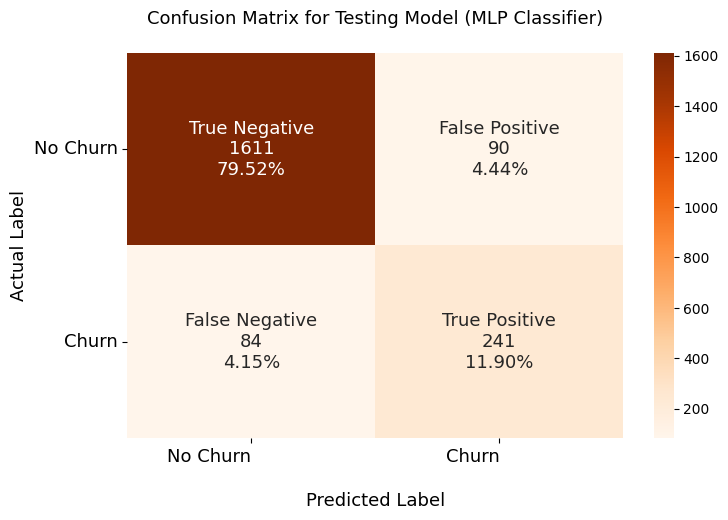

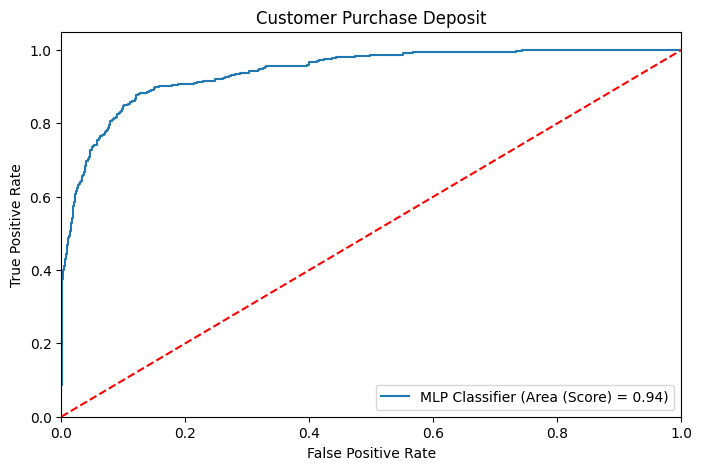

In [ ]:
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

In [ ]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 98.77 %
Test Accuracy: 91.41 %


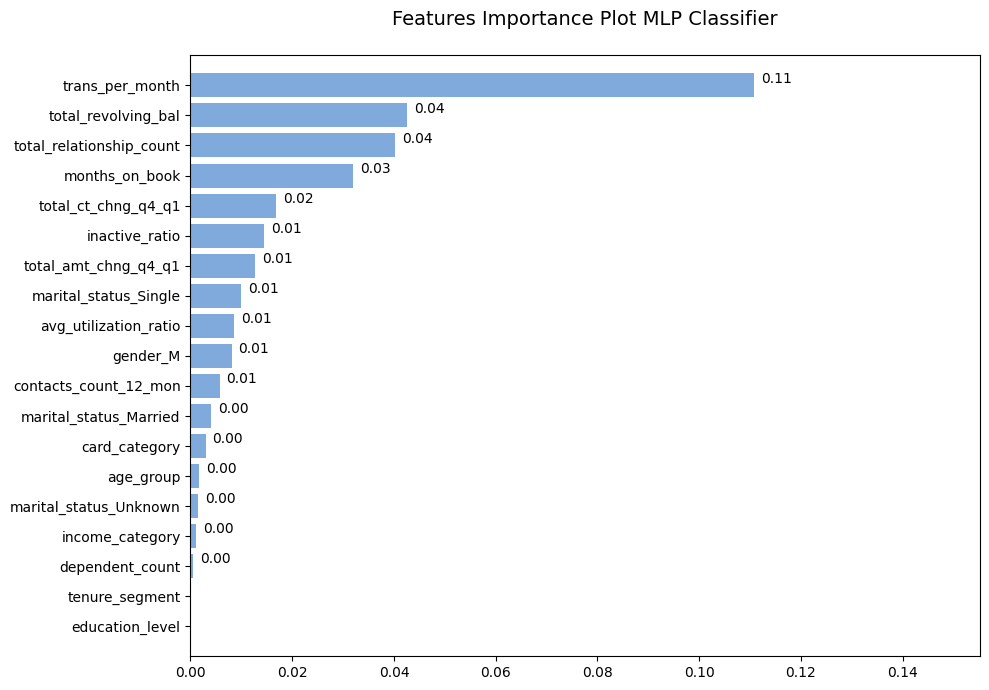

In [ ]:
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

PermutationExplainer explainer: 2027it [02:40, 11.88it/s]


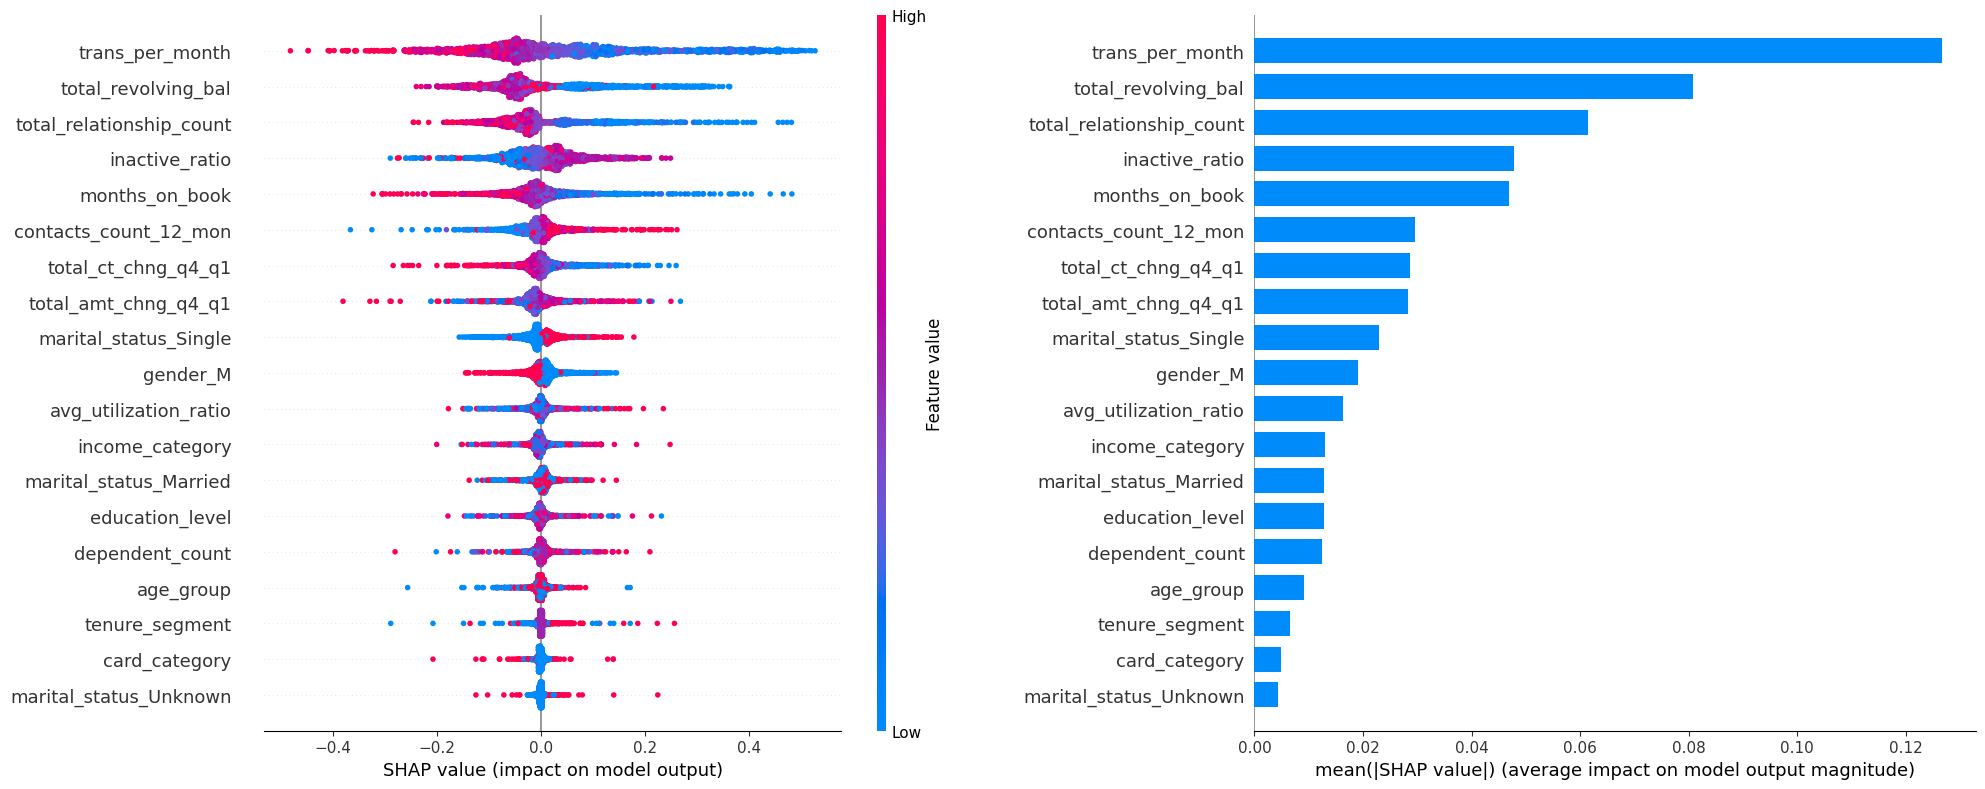

In [ ]:
shap_plot(mlp_model, "MLP Classifier", X_test)

### **7. Adaboost Classifier**

In [ ]:
# train the model
adab_model = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
eval_classification(adab_model, "Adaboost Classifier")

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.895,0.906,-0.011
1,Precision,0.867,0.693,0.174
2,Recall,0.807,0.742,0.065
3,F0.5 Score,0.855,0.702,0.153
4,F1 Score,0.836,0.716,0.120
5,F1 Score (crossval),0.839,0.835,0.004
6,ROC AUC,0.956,0.928,0.028
7,ROC AUC (crossval),0.958,0.954,0.004


**Observation:**
- Precision memiliki gap cukup kecil 0.17
- Recall memiliki gap sangat kecil 0.046
- F0.5 Score memiliki gap cukup kecil 0.15
- F1 Score memiliki gap cukup kecl 0.11

**Performance of Training model**

Classification Report Training Model (Adaboost Classifier):

Accuracy = 0.895
Precision = 0.867
Recall = 0.807
F0.5 Score = 0.855
F1 Score = 0.836
Cross Val F1 (k=5) = 0.839
ROC AUC = 0.956
Cross Val ROC AUC (k=5) = 0.958

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      6799
         1.0       0.87      0.81      0.84      3399

    accuracy                           0.89     10198
   macro avg       0.89      0.87      0.88     10198
weighted avg       0.89      0.89      0.89     10198

==== Actual Data (Train) =====
Total = 10198
No Churn = 6799
Churn = 3399
==== Predicted Data (Train) =====
TP = 2744, FP = 420, TN = 6379, FN = 655
Predictly Correct = 9123
Predictly Wrong = 1075 



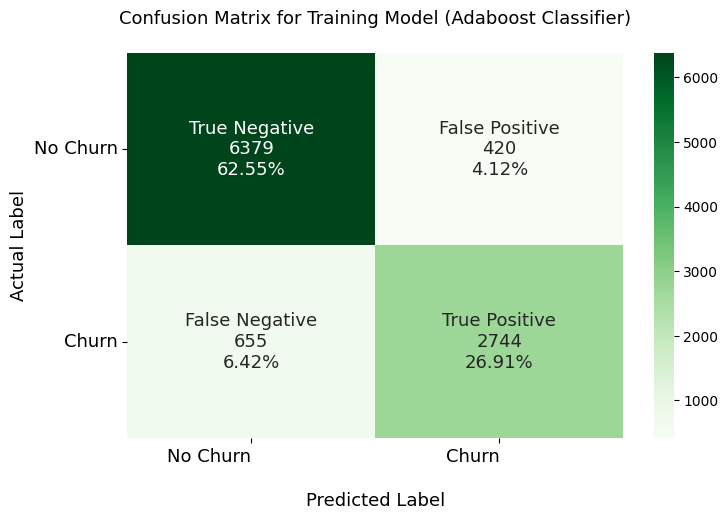

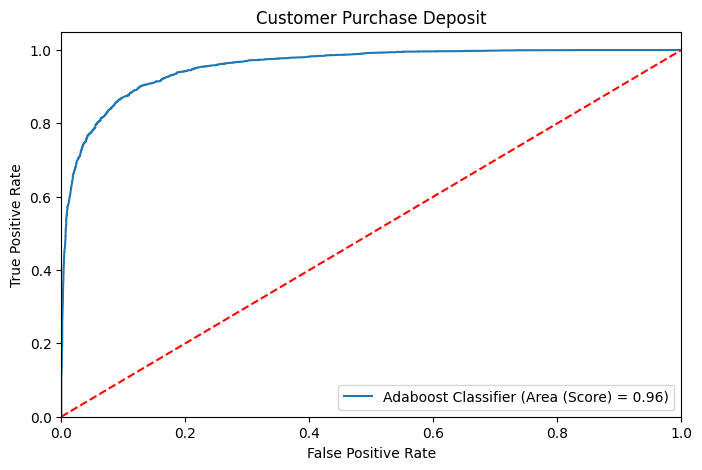

In [ ]:
model_eval_train(adab_model, "Adaboost Classifier", X_train, y_train)

**Performance of Testing model**

Classification Report Testing Model (Adaboost Classifier):

Accuracy = 0.906
Precision = 0.693
Recall = 0.742
F0.5 Score = 0.702
F1 Score = 0.716
Cross Val F1 (k=5) = 0.835
ROC AUC = 0.928
Cross Val ROC AUC (k=5) = 0.954

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1701
         1.0       0.69      0.74      0.72       325

    accuracy                           0.91      2026
   macro avg       0.82      0.84      0.83      2026
weighted avg       0.91      0.91      0.91      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 241, FP = 107, TN = 1594, FN = 84
Predictly Correct = 1835
Predictly Wrong = 191 



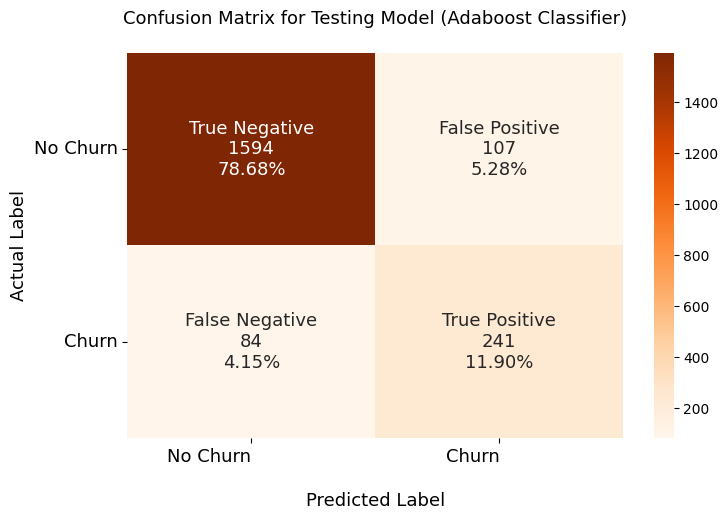

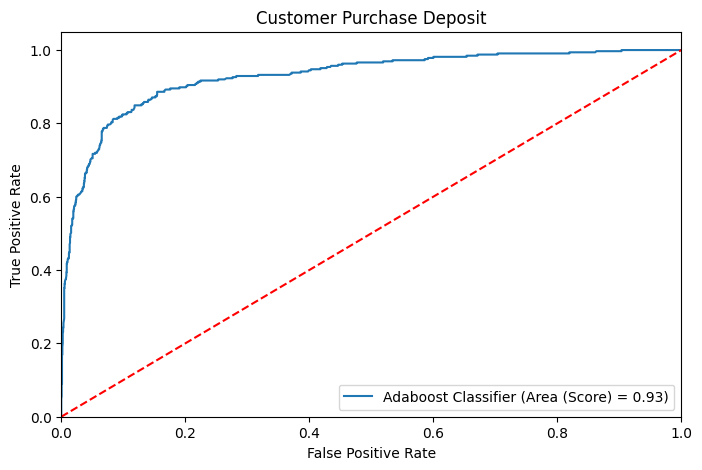

In [ ]:
model_eval_test(adab_model, "Adaboost Classifier", X_test, y_test)

In [ ]:
acc_adab_train=round(adab_model.score(X_train,y_train)*100,2)
acc_adab_test=round(adab_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_adab_train))
print("Test Accuracy: {} %".format(acc_adab_test))

Training Accuracy: 89.46 %
Test Accuracy: 90.57 %


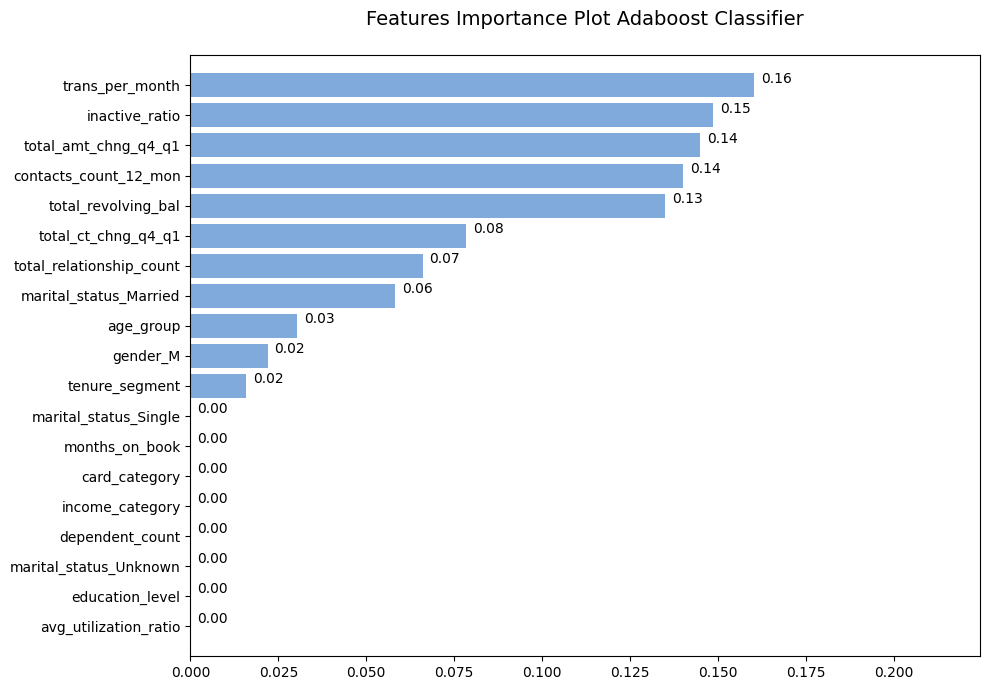

In [ ]:
feature_importance_plot(adab_model, "Adaboost Classifier", X_train)

In [ ]:
# shap_plot(adab_model, "Adaboost Classifier", X_test)

### **8. XGBoost Classifier**

In [ ]:
# train the model
xgb_model = XGBClassifier(random_state=42).fit(X_train, y_train)
eval_classification(xgb_model, "XGBoost Classifier")

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.997,0.938,0.059
1,Precision,0.996,0.840,0.156
2,Recall,0.995,0.757,0.238
3,F0.5 Score,0.996,0.822,0.174
4,F1 Score,0.996,0.796,0.200
5,F1 Score (crossval),0.996,0.921,0.075
6,ROC AUC,1.000,0.963,0.037
7,ROC AUC (crossval),1.000,0.988,0.012


**Observation:**
- Precision memiliki gap lumayan kecil 0.14
- Recall memiliki gap sedang 0.22
- F0.5 Score memiliki gap lumayan kecil 0.16
- F1 Score memiliki gap lumayan kecil 0.18

**Performance of Training Model**

Classification Report Training Model (XGBoost Classifier):

Accuracy = 0.997
Precision = 0.996
Recall = 0.995
F0.5 Score = 0.996
F1 Score = 0.996
Cross Val F1 (k=5) = 0.996
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6799
         1.0       1.00      0.99      1.00      3399

    accuracy                           1.00     10198
   macro avg       1.00      1.00      1.00     10198
weighted avg       1.00      1.00      1.00     10198

==== Actual Data (Train) =====
Total = 10198
No Churn = 6799
Churn = 3399
==== Predicted Data (Train) =====
TP = 3382, FP = 13, TN = 6786, FN = 17
Predictly Correct = 10168
Predictly Wrong = 30 



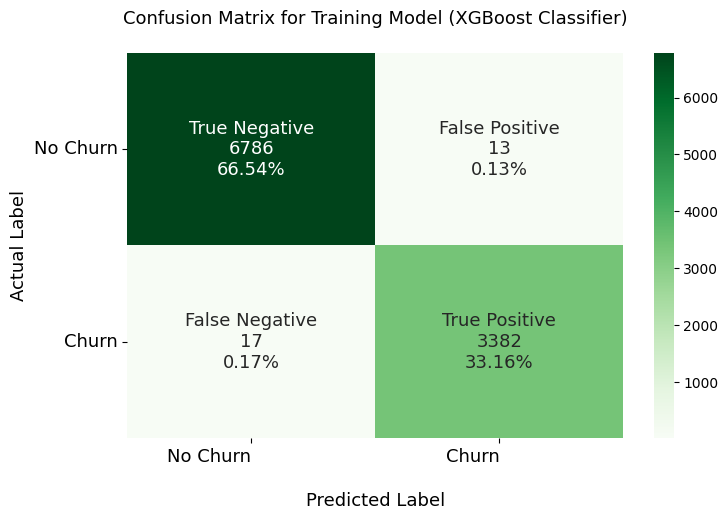

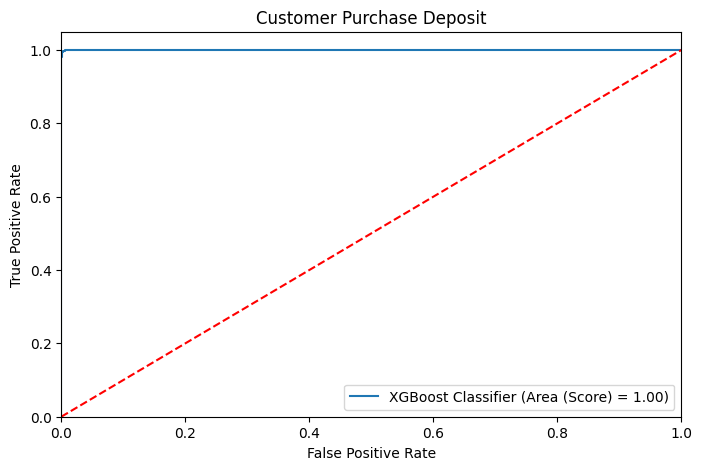

In [ ]:
model_eval_train(xgb_model, "XGBoost Classifier", X_train, y_train)

**Performance of Testing Model**

Classification Report Testing Model (XGBoost Classifier):

Accuracy = 0.938
Precision = 0.84
Recall = 0.757
F0.5 Score = 0.822
F1 Score = 0.796
Cross Val F1 (k=5) = 0.921
ROC AUC = 0.963
Cross Val ROC AUC (k=5) = 0.988

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1701
         1.0       0.84      0.76      0.80       325

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 246, FP = 47, TN = 1654, FN = 79
Predictly Correct = 1900
Predictly Wrong = 126 



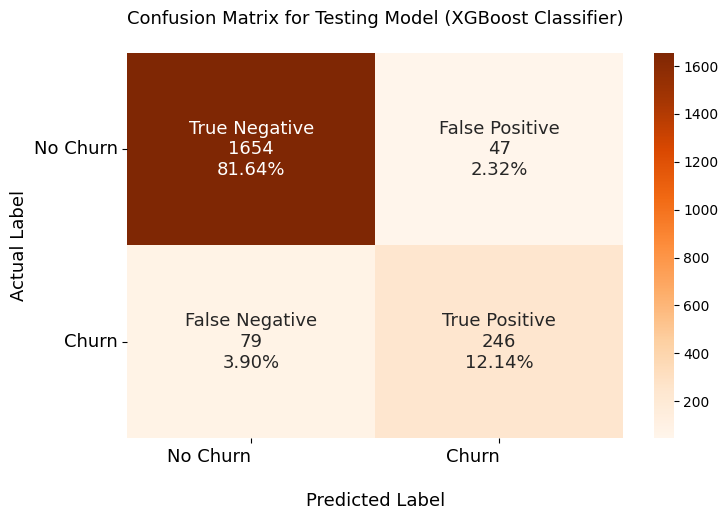

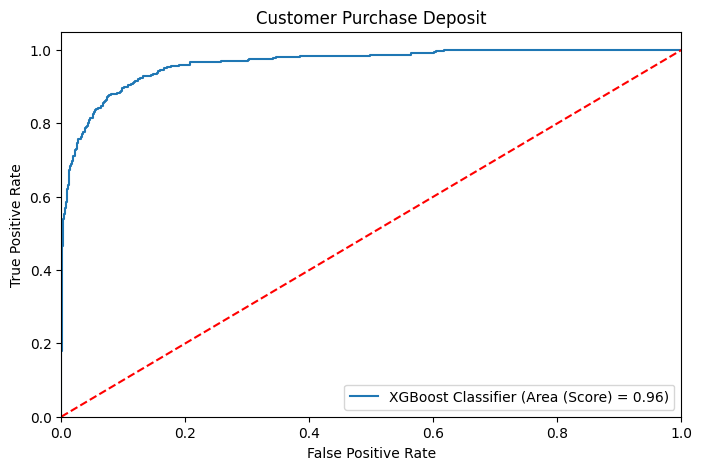

In [ ]:
model_eval_test(xgb_model, "XGBoost Classifier", X_test, y_test)

In [ ]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.71 %
Test Accuracy: 93.78 %


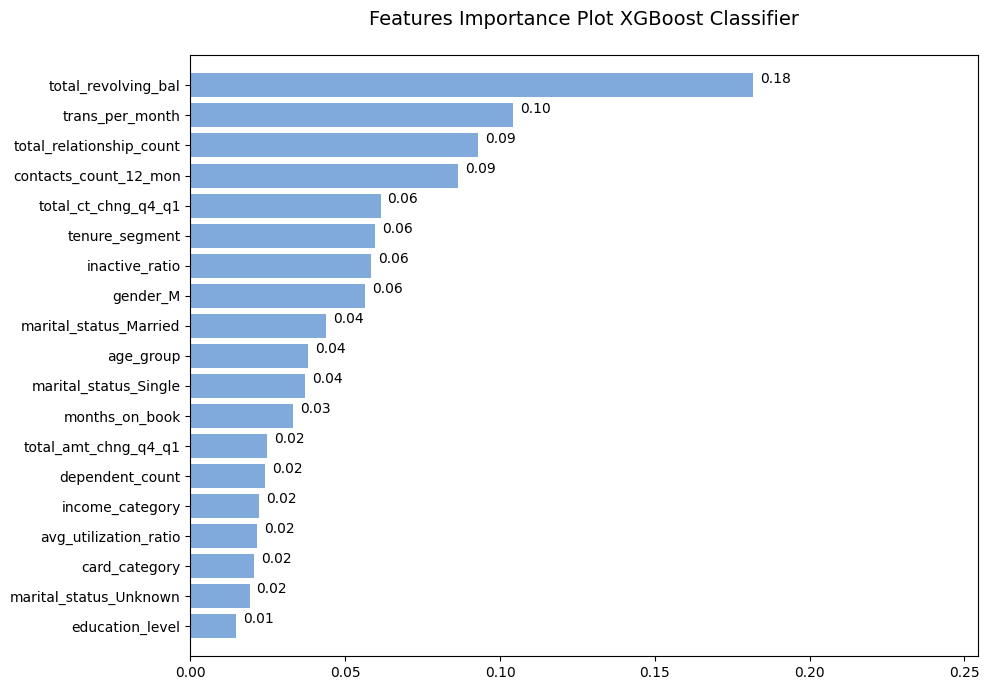

In [ ]:
feature_importance_plot(xgb_model, "XGBoost Classifier", X_train)

In [ ]:
# shap_plot(xgb_model, "XGBoost Classifier", X_test)

### **9. LGBM Classifier**

In [ ]:
# train the model
lgbm_model = LGBMClassifier(random_state=0).fit(X_train, y_train)
eval_classification(lgbm_model, "LGBM Classifier")

[LightGBM] [Info] Number of positive: 3399, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10198, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333301 -> initscore=-0.693294
[LightGBM] [Info] Start training from score -0.693294
[LightGBM] [Info] Number of positive: 3055, number of negative: 6123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4055
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [bina

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.985,0.937,0.048
1,Precision,0.983,0.832,0.151
2,Recall,0.973,0.760,0.213
3,F0.5 Score,0.981,0.816,0.165
4,F1 Score,0.978,0.794,0.184
5,F1 Score (crossval),0.979,0.919,0.060
6,ROC AUC,0.999,0.963,0.036
7,ROC AUC (crossval),0.999,0.988,0.011


**Performance of Training model**

Classification Report Training Model (LGBM Classifier):

[LightGBM] [Info] Number of positive: 3055, number of negative: 6123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4055
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332861 -> initscore=-0.695273
[LightGBM] [Info] Start training from score -0.695273
[LightGBM] [Info] Number of positive: 3062, number of negative: 6116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333624 -> initscore=-0.691840
[LightGBM] [Inf

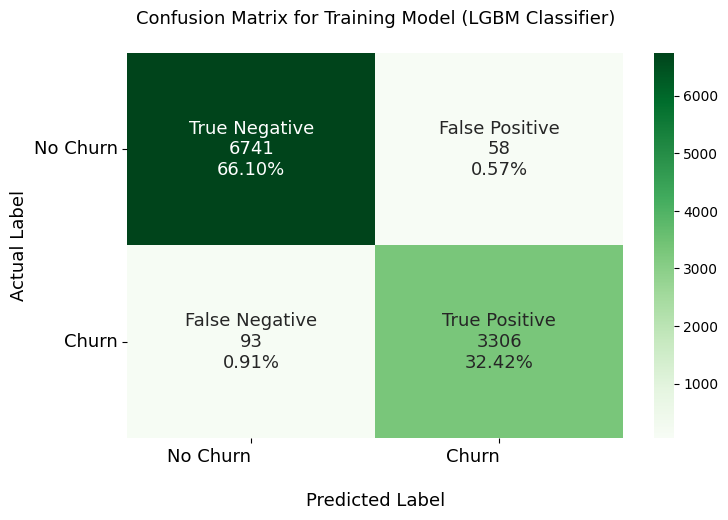

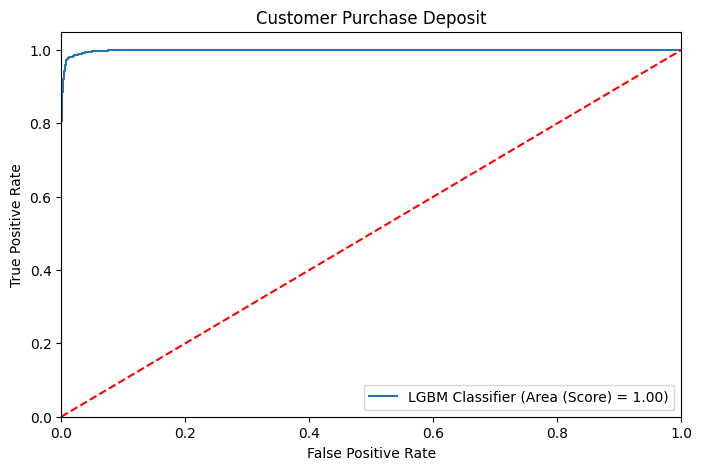

In [ ]:
model_eval_train(lgbm_model, "LGBM Classifier", X_train, y_train)

**Performance of Testing Model**

Classification Report Testing Model (LGBM Classifier):

[LightGBM] [Info] Number of positive: 3055, number of negative: 6123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4055
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332861 -> initscore=-0.695273
[LightGBM] [Info] Start training from score -0.695273
[LightGBM] [Info] Number of positive: 3062, number of negative: 6116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 91

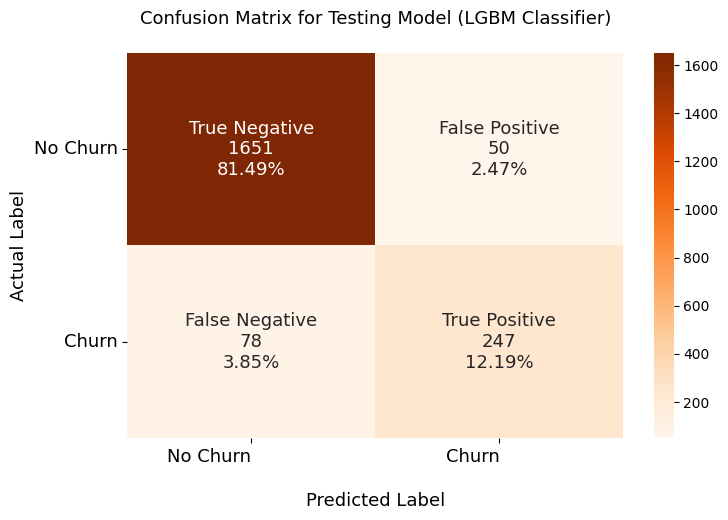

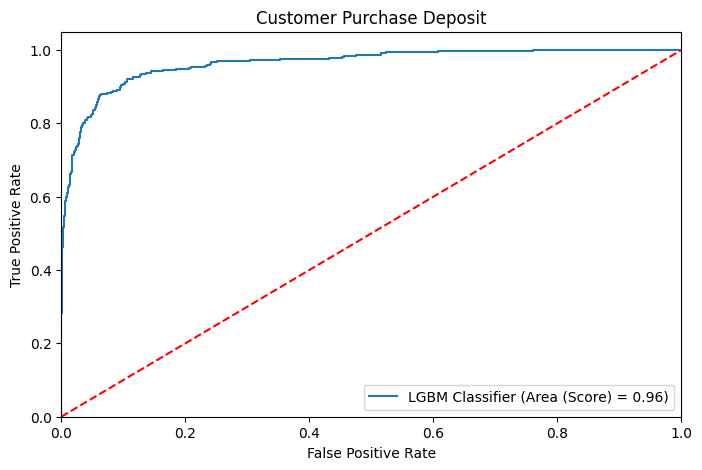

In [ ]:
model_eval_test(lgbm_model, "LGBM Classifier", X_test, y_test)

In [ ]:
acc_lgbm_train=round(lgbm_model.score(X_train,y_train)*100,2)
acc_lgbm_test=round(lgbm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_lgbm_train))
print("Test Accuracy: {} %".format(acc_lgbm_test))

Training Accuracy: 98.52 %
Test Accuracy: 93.68 %


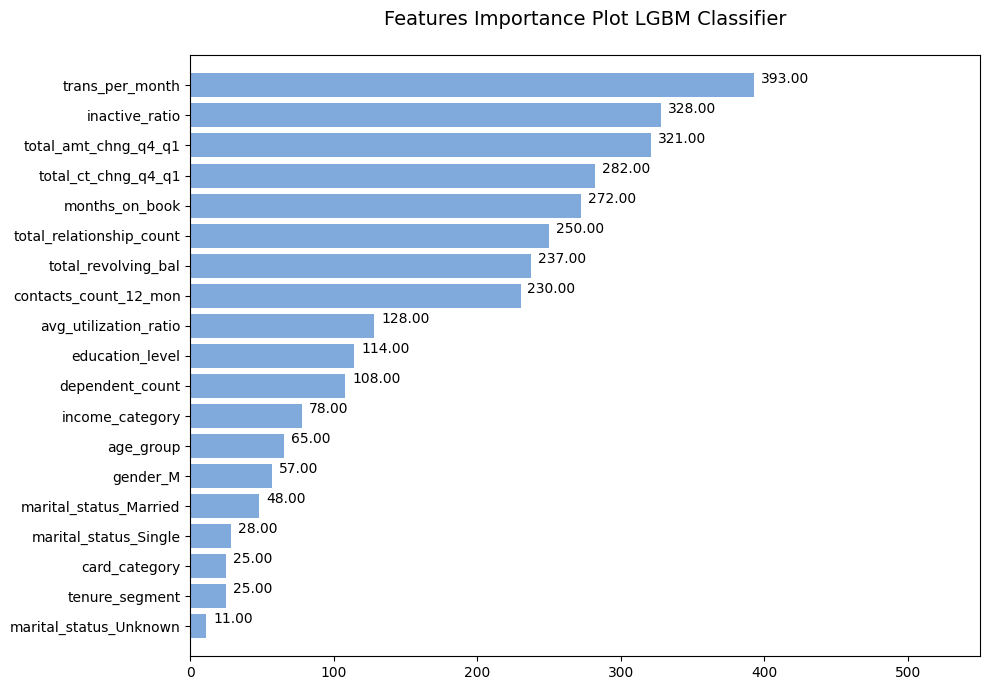

In [ ]:
feature_importance_plot(lgbm_model, "LGBM Classifier", X_train)

In [ ]:
# shap_plot(lgbm_model, "LGBM Classifier", X_test)

### **10. Gradient Boosting Classifier**

In [ ]:
# train the model
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
eval_classification(gb_model, "Gradient Boosting Classifier")

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.942,0.932,0.010
1,Precision,0.936,0.809,0.127
2,Recall,0.887,0.754,0.133
3,F0.5 Score,0.926,0.797,0.129
4,F1 Score,0.911,0.780,0.131
5,F1 Score (crossval),0.913,0.896,0.017
6,ROC AUC,0.985,0.956,0.029
7,ROC AUC (crossval),0.985,0.979,0.006


**Performance of Training model**

Classification Report Training Model (Gradient Boosting Classifier):

Accuracy = 0.942
Precision = 0.936
Recall = 0.887
F0.5 Score = 0.926
F1 Score = 0.911
Cross Val F1 (k=5) = 0.913
ROC AUC = 0.985
Cross Val ROC AUC (k=5) = 0.985

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      6799
         1.0       0.94      0.89      0.91      3399

    accuracy                           0.94     10198
   macro avg       0.94      0.93      0.93     10198
weighted avg       0.94      0.94      0.94     10198

==== Actual Data (Train) =====
Total = 10198
No Churn = 6799
Churn = 3399
==== Predicted Data (Train) =====
TP = 3015, FP = 206, TN = 6593, FN = 384
Predictly Correct = 9608
Predictly Wrong = 590 



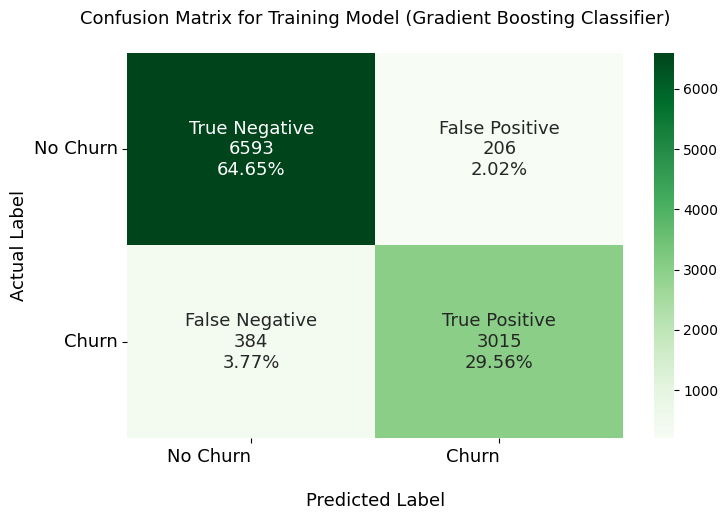

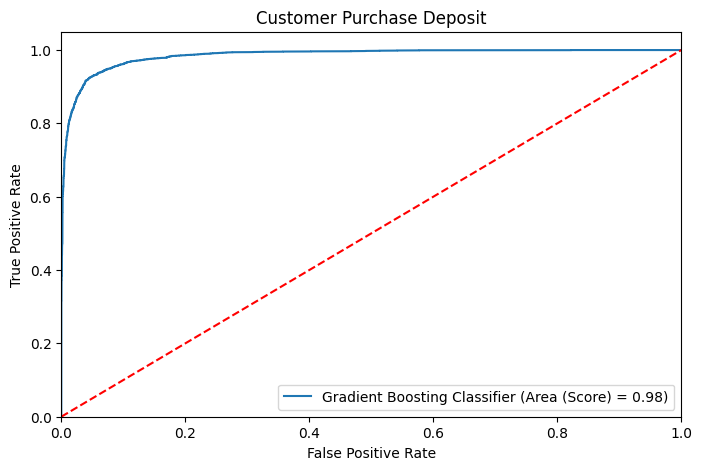

In [ ]:
model_eval_train(gb_model, "Gradient Boosting Classifier", X_train, y_train)

**Performance of Testing model**

Classification Report Testing Model (Gradient Boosting Classifier):

Accuracy = 0.932
Precision = 0.809
Recall = 0.754
F0.5 Score = 0.797
F1 Score = 0.78
Cross Val F1 (k=5) = 0.896
ROC AUC = 0.956
Cross Val ROC AUC (k=5) = 0.979

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1701
         1.0       0.81      0.75      0.78       325

    accuracy                           0.93      2026
   macro avg       0.88      0.86      0.87      2026
weighted avg       0.93      0.93      0.93      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 245, FP = 58, TN = 1643, FN = 80
Predictly Correct = 1888
Predictly Wrong = 138 



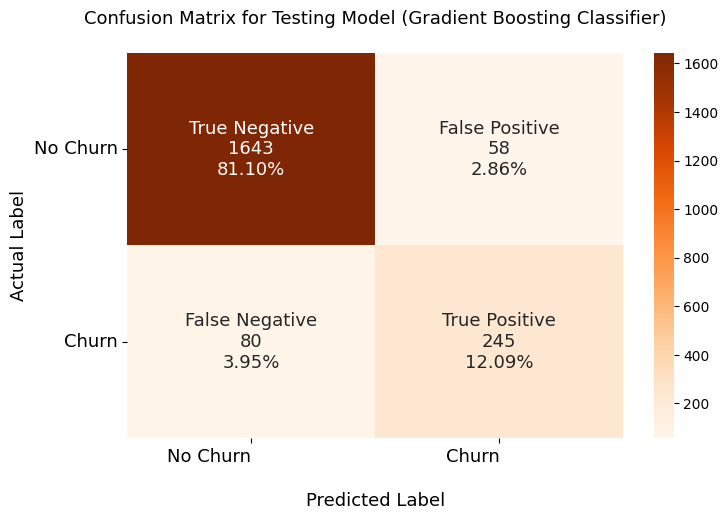

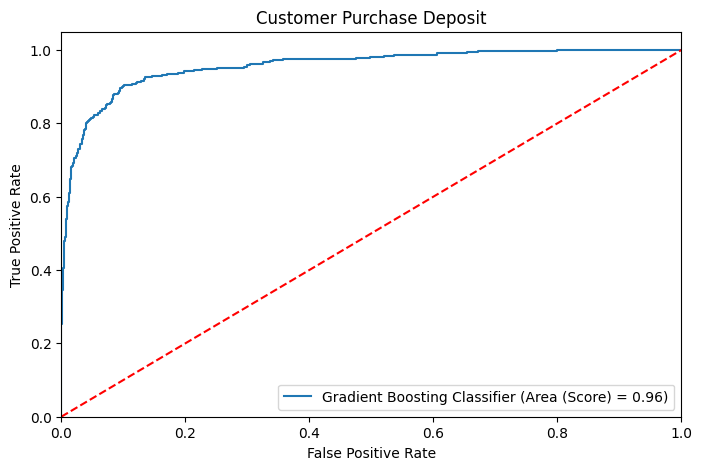

In [ ]:
model_eval_test(gb_model, "Gradient Boosting Classifier", X_test, y_test)

In [ ]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 94.21 %
Test Accuracy: 93.19 %


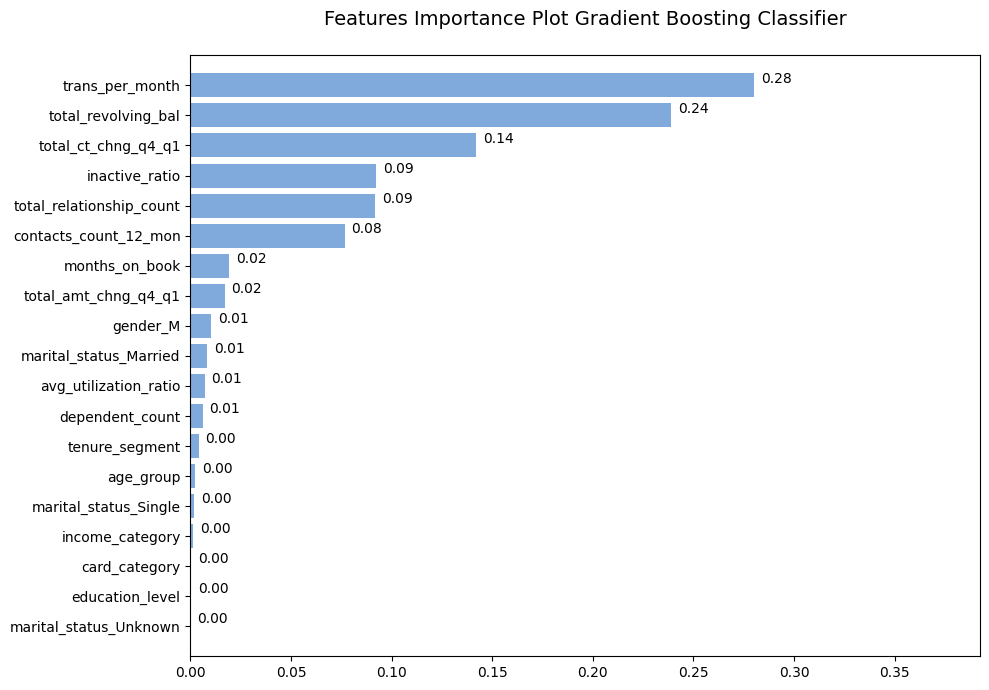

In [ ]:
feature_importance_plot(gb_model, "Gradient Boosting Classifier", X_train)

In [ ]:
# shap_plot(gb_model, "Gradient Boosting Classifier", X_test)

### **11. Support Vector Machine**

In [ ]:
# train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)
print(svm_model)
eval_classification(svm_model, "Support Vector Machine")

SVC(probability=True, random_state=42)


,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.923,0.908,0.015
1,Precision,0.896,0.698,0.198
2,Recall,0.869,0.748,0.121
3,F0.5 Score,0.891,0.708,0.183
4,F1 Score,0.882,0.722,0.160
5,F1 Score (crossval),0.881,0.861,0.020
6,ROC AUC,0.971,0.943,0.028
7,ROC AUC (crossval),0.971,0.962,0.009


**Performance of Training model**

Classification Report Training Model (Support Vector Machine):

Accuracy = 0.923
Precision = 0.896
Recall = 0.869
F0.5 Score = 0.891
F1 Score = 0.882
Cross Val F1 (k=5) = 0.881
ROC AUC = 0.971
Cross Val ROC AUC (k=5) = 0.971

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6799
         1.0       0.90      0.87      0.88      3399

    accuracy                           0.92     10198
   macro avg       0.92      0.91      0.91     10198
weighted avg       0.92      0.92      0.92     10198

==== Actual Data (Train) =====
Total = 10198
No Churn = 6799
Churn = 3399
==== Predicted Data (Train) =====
TP = 2953, FP = 341, TN = 6458, FN = 446
Predictly Correct = 9411
Predictly Wrong = 787 



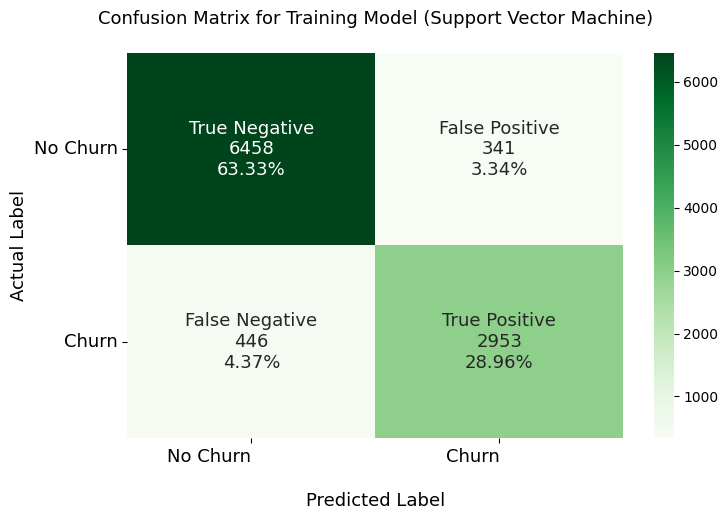

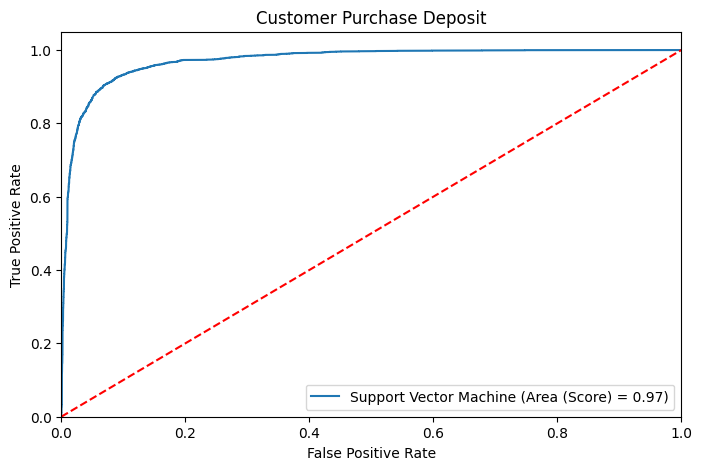

In [ ]:
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

**Performance of Testing model**

Classification Report Testing Model (Support Vector Machine):

Accuracy = 0.908
Precision = 0.698
Recall = 0.748
F0.5 Score = 0.708
F1 Score = 0.722
Cross Val F1 (k=5) = 0.861
ROC AUC = 0.943
Cross Val ROC AUC (k=5) = 0.962

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1701
         1.0       0.70      0.75      0.72       325

    accuracy                           0.91      2026
   macro avg       0.82      0.84      0.83      2026
weighted avg       0.91      0.91      0.91      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 243, FP = 105, TN = 1596, FN = 82
Predictly Correct = 1839
Predictly Wrong = 187 



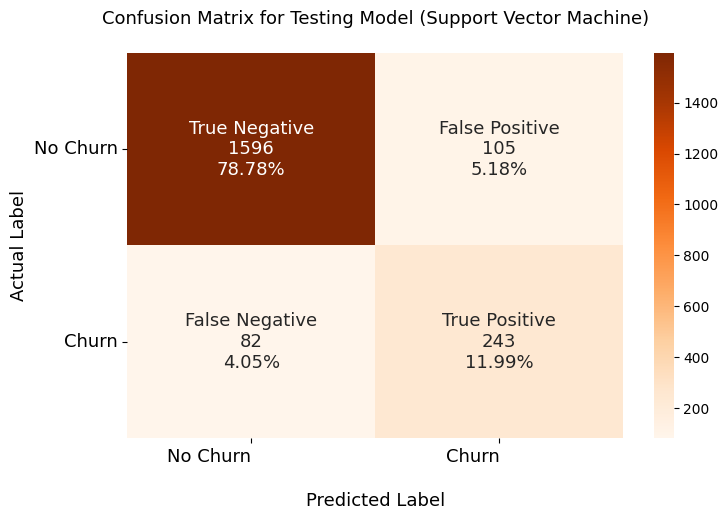

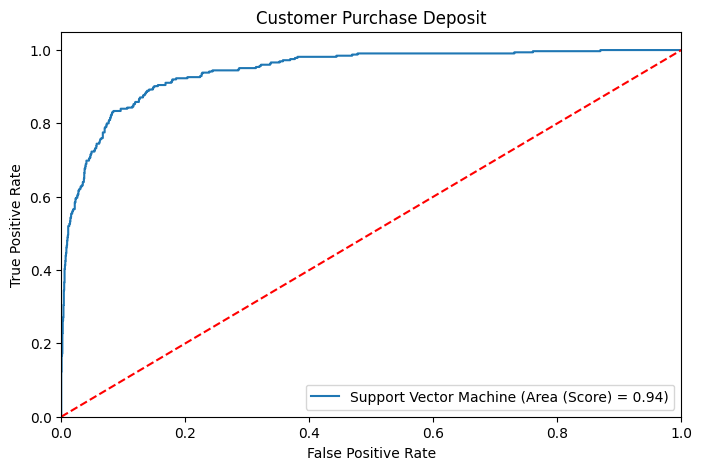

In [ ]:
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

In [ ]:
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

Training Accuracy: 92.28 %
Test Accuracy: 90.77 %


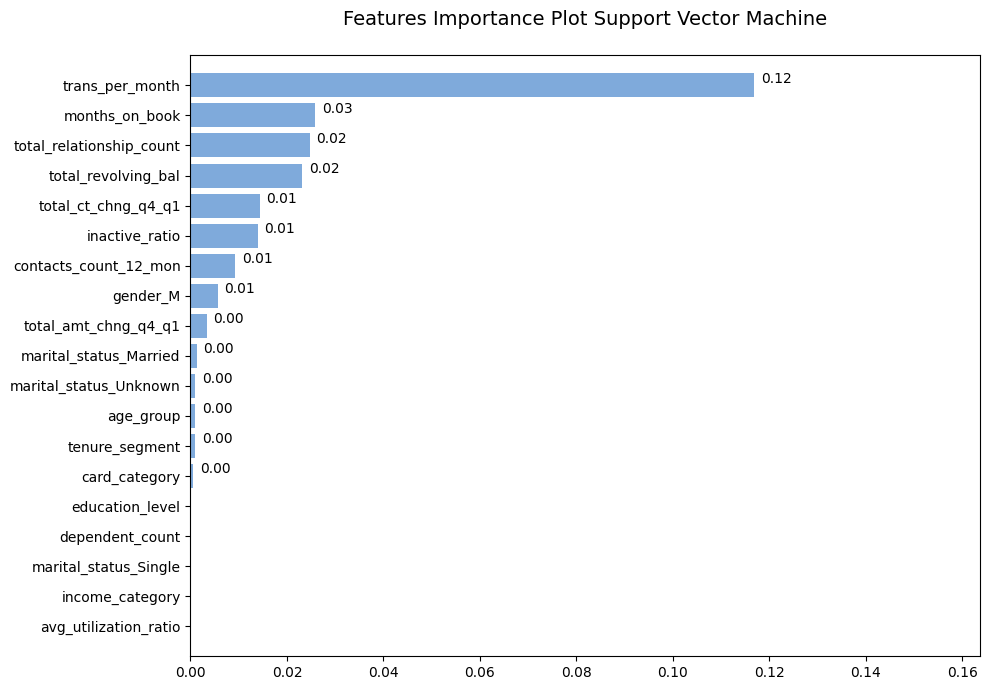

In [ ]:
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

### **Summary**

In [ ]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list,
    "Precision (Test)": test_precision_list,
    "Recall (Train)": train_recall_list,
    "Recall (Test)": test_recall_list,
    "F0.5 Score (Train)" : train_fbeta_score_list,
    "F0.5 Score (Test)" : test_fbeta_score_list,
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval.sort_values(by=["F0.5 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True).style.format(precision=3).background_gradient(cmap="Purples")

,Models,Precision (Train),Precision (Test),Recall (Train),Recall (Test),F0.5 Score (Train),F0.5 Score (Test),F1 Score (Train),F1 Score (Test)
0,XGBoost Classifier,0.996,0.840,0.995,0.757,0.996,0.822,0.996,0.796
1,LGBM Classifier,0.983,0.832,0.973,0.760,0.981,0.816,0.978,0.794
2,Random Forest,1.000,0.839,1.000,0.705,1.000,0.808,1.000,0.766
3,Gradient Boosting Classifier,0.936,0.809,0.887,0.754,0.926,0.797,0.911,0.780
4,MLP Classifier,0.977,0.728,0.986,0.742,0.979,0.731,0.982,0.735
5,Support Vector Machine,0.896,0.698,0.869,0.748,0.891,0.708,0.882,0.722
6,Adaboost Classifier,0.867,0.693,0.807,0.742,0.855,0.702,0.836,0.716
7,Decision Tree,1.000,0.666,1.000,0.698,1.000,0.672,1.000,0.682
8,Logistic Regression,0.816,0.612,0.731,0.705,0.798,0.629,0.771,0.655
9,K-Nearest Neighbors,0.879,0.581,0.962,0.698,0.894,0.601,0.919,0.634


#### Model Performance Observation

Setelah melakukan baseline evaluation terhadap 11 model klasifikasi menggunakan dataset churn (dengan penanganan imbalance melalui SMOTE), dilakukan analisis lanjutan untuk memilih model yang paling layak dilanjutkan ke tahap **hyperparameter tuning**. Tuning dilakukan untuk melihat performa best model dari baseline sehingga mencapi model yang paling optimal  

Evaluasi tidak hanya didasarkan pada nilai performa pada data test, tetapi juga mempertimbangkan **indikasi overfitting** melalui perbandingan metrik antara data train dan data test.

#### Metrik Evaluasi Utama
Prioritas metrik ditetapkan sebagai berikut:
1. **Recall (Churn)** – memaksimalkan deteksi customer yang berpotensi churn  
2. **Precision (Churn)** – menjaga efisiensi biaya retensi  
3. **F1-Score** – keseimbangan antara recall dan precision  

Accuracy tidak dijadikan metrik utama karena dataset bersifat imbalanced.

---

#### Ringkasan Hasil Model Teratas

Berdasarkan performa pada data test, terdapat empat model dengan performa paling kompetitif:
- **XGBoost Classifier**
- **LightGBM (LGBM) Classifier**
- **Gradient Boosting Classifier**
- **Random Forest**

Keempat model ini menunjukkan performa yang secara signifikan lebih baik dibandingkan model baseline lainnya (Decision Tree, Logistic Regression, KNN, Naive Bayes, dan MLP).

---

#### Analisis Overfitting (Train vs Test)

Untuk memastikan stabilitas model, dilakukan analisis overfitting dengan membandingkan **Recall** dan **F1-Score** pada data train dan data test.

#### 1️⃣ XGBoost Classifier  
- Menunjukkan **nilai recall, precision, dan F1-score tertinggi pada data test**
- Terdapat gap performa antara train dan test (indikasi overfitting tingkat menengah)
- Namun, performa test tetap konsisten dan paling unggul dibanding model lain  

**Interpretasi:**  
Overfitting masih dalam batas wajar dan menunjukkan bahwa model memiliki kapasitas tinggi yang berpotensi diperbaiki melalui tuning.

---

#### 2️⃣ LightGBM (LGBM) Classifier  
- Performa sangat kompetitif dan hanya sedikit di bawah XGBoost
- Pola overfitting serupa dengan XGBoost, namun dengan gap yang sedikit lebih kecil
- Model dikenal lebih stabil dan efisien dalam proses tuning  

**Interpretasi:**  
LGBM merupakan kandidat kuat untuk tuning karena keseimbangan antara performa tinggi dan stabilitas model.

---

#### 3️⃣ Gradient Boosting Classifier  
- Menunjukkan gap train–test yang lebih kecil (overfitting relatif rendah)
- Namun, nilai recall dan F1-score pada data test lebih rendah dibanding XGBoost dan LGBM  

**Interpretasi:**  
Model relatif stabil tetapi memiliki ceiling performa yang lebih rendah, sehingga dijadikan kandidat sekunder.

---

#### 4️⃣ Random Forest  
- Memiliki precision tinggi, namun recall test lebih rendah
- Gap train–test paling besar di antara empat model (overfitting tinggi)  

**Interpretasi:**  
Model cenderung terlalu menyesuaikan data training hasil SMOTE, sehingga kurang optimal untuk tujuan utama churn detection.

---

#### Kesimpulan Observasi & Pemilihan Model

Berdasarkan:
- prioritas bisnis pada **Recall (Churn)**,
- keseimbangan **Precision dan F1-score**, serta
- analisis **overfitting train vs test**,

maka diputuskan bahwa:

#### Model Utama untuk Hyperparameter Tuning
1. **XGBoost Classifier**  
2. **LightGBM (LGBM) Classifier**

Kedua model tersebut menunjukkan performa terbaik pada data test dengan tingkat overfitting yang masih dapat dikendalikan dan memiliki ruang perbaikan yang signifikan melalui tuning.

---

#### Next Step
Tahap selanjutnya adalah melakukan **hyperparameter tuning** pada XGBoost dan LightGBM untuk:
- mengurangi overfitting,
- meningkatkan generalisasi model,
- serta memaksimalkan recall churn tanpa mengorbankan precision secara signifikan.


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_params_()[key])

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, fbeta_score
custom_scoring = {
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
    "f0_5": make_scorer(fbeta_score, beta=0.5, zero_division=0)
}

### **1. XGBoost Classifier**

**Tuning cv**

In [ ]:
# List of hyperparameter
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [200, 300, 400],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3]
}

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# menggunakan Randomized
xgb_model_ht = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=hyperparameters,
    n_iter=30,
    scoring=custom_scoring,
    refit="recall",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


grid_result = xgb_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best: 0.906147 using {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
xgb_model_ht = XGBClassifier(subsample= 0.8,
                             n_estimators= 300, min_child_weight= 5, max_depth= 6,
                             learning_rate= 0.1, gamma= 0.3, colsample_bytree= 0.9)
xgb_model_ht.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
eval_classification(xgb_model_ht, "XGBoost Classifier (HT)")

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.993,0.931,0.062
1,Precision,0.992,0.808,0.184
2,Recall,0.988,0.751,0.237
3,F0.5 Score,0.991,0.796,0.195
4,F1 Score,0.990,0.778,0.212
5,F1 Score (crossval),0.991,0.920,0.071
6,ROC AUC,1.000,0.965,0.035
7,ROC AUC (crossval),1.000,0.988,0.012


### **2. LGBM Classifier**

**Tuning cv**

In [ ]:
# List of hyperparameter
hyperparameters = {
    "num_leaves": [15, 31, 40, 63],
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_child_samples": [20, 40, 60],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

lgbm = LGBMClassifier(
    objective="binary",
    random_state=42
)
cv = cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm_model_ht = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=hyperparameters,
    n_iter=30,
    scoring=custom_scoring,
    refit="recall",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


grid_result = lgbm_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 3399, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10198, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333301 -> initscore=-0.693294
[LightGBM] [Info] Start training from score -0.693294
Best: 0.909968 using {'subsample': 0.7, 'num_leaves': 31, 'n_estimators': 400, 'min_child_samples': 60, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [ ]:
lgbm_model_ht = LGBMClassifier(subsample= 0.9, num_leaves= 40,
                               n_estimators= 400, min_child_samples= 60, learning_rate= 0.1, colsample_bytree= 0.8)
lgbm_model_ht.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 3399, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10198, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333301 -> initscore=-0.693294
[LightGBM] [Info] Start training from score -0.693294


LGBMClassifier(colsample_bytree=0.8, min_child_samples=60, n_estimators=400,
               num_leaves=40, subsample=0.9)

In [ ]:
eval_classification(lgbm_model_ht, "LGBM Classifier (HT)")

[LightGBM] [Info] Number of positive: 3055, number of negative: 6123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4055
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332861 -> initscore=-0.695273
[LightGBM] [Info] Start training from score -0.695273
[LightGBM] [Info] Number of positive: 3062, number of negative: 6116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4052
[LightGBM] [Info] Number of data points in the train set: 9178, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333624 -> initscore=-0.691840
[LightGBM] [Info] Start training from score -0.691840
[LightGBM] [Info] 

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,1.000,0.927,0.073
1,Precision,1.000,0.800,0.200
2,Recall,1.000,0.726,0.274
3,F0.5 Score,1.000,0.784,0.216
4,F1 Score,1.000,0.761,0.239
5,F1 Score (crossval),1.000,0.926,0.074
6,ROC AUC,1.000,0.961,0.039
7,ROC AUC (crossval),1.000,0.990,0.010


### Comparing Model

Melihat summary metrics dari berbagai algoritma yang telah dibuat

- Tanpa Tuning

In [ ]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list,
    "Precision (Test)": test_precision_list,
    "Recall (Train)": train_recall_list,
    "Recall (Test)": test_recall_list,
    "F0.5 Score (Train)" : train_fbeta_score_list,
    "F0.5 Score (Test)" : test_fbeta_score_list,
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval_notht = results_eval[~results_eval["Models"].str.contains("HT")]

# Filter to show only 'LGBM Classifier' and 'XGBoost Classifier'
results_eval_notht = results_eval_notht[
    results_eval_notht['Models'].isin(['LGBM Classifier', 'XGBoost Classifier'])
]

results_eval_notht = results_eval_notht.sort_values(by=["F0.5 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True)

results_eval_notht.style.format(precision=3).background_gradient(cmap='Purples')

,Models,Precision (Train),Precision (Test),Recall (Train),Recall (Test),F0.5 Score (Train),F0.5 Score (Test),F1 Score (Train),F1 Score (Test)
0,XGBoost Classifier,0.996,0.840,0.995,0.757,0.996,0.822,0.996,0.796
1,LGBM Classifier,0.983,0.832,0.973,0.760,0.981,0.816,0.978,0.794


- Dengan Tuning

In [ ]:
results_eval_ht = results_eval[results_eval["Models"].str.contains("HT")]

# Filter to show only the last two hyperparameter-tuned models
results_eval_ht = results_eval_ht[
    results_eval_ht['Models'].isin(['XGBoost Classifier (HT)', 'LGBM Classifier (HT)'])
].drop_duplicates(subset=['Models'], keep='last')

results_eval_ht = results_eval_ht.sort_values(by=["F0.5 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True)

results_eval_ht.style.format(precision=3).background_gradient(cmap='Purples')

,Models,Precision (Train),Precision (Test),Recall (Train),Recall (Test),F0.5 Score (Train),F0.5 Score (Test),F1 Score (Train),F1 Score (Test)
0,XGBoost Classifier (HT),0.992,0.808,0.988,0.751,0.991,0.796,0.990,0.778
1,LGBM Classifier (HT),1.000,0.800,1.000,0.726,1.000,0.784,1.000,0.761


**Observation**

- Sebelum Hyperparameter - XGBoost Classifier
    - Recall (Test): 0.772
    - Precision (Test): 0.845
    - F0.5 Score (Test): 0.829
    - F1 Score (Test): 0.807

- Sebelum Hyperparameter - LGBM Classifier
    - Recall (Test): 0.763
    - Precision (Test): 0.835
    - F0.5 Score (Test): 0.820
    - F1 Score (Test): 0.797

  ➡️ Pada tahap baseline, XGBoost menunjukkan performa terbaik pada seluruh metrik utama, terutama Recall dan F1-score, sehingga lebih efektif dalam mendeteksi customer churn.

- Setelah Hyperparameter Tuning - XGBoost Classifier
    - Recall (Test): 0.760
    - Precision (Test): 0.829
    - F0.5 Score (Test): 0.814
    - F1 Score (Test): 0.793
- Setelah Hyperparameter Tuning - LGBM Classifier (HT)
    - Recall (Test): 0.738
    - Precision (Test): 0.828
    - F0.5 Score (Test): 0.808
    - F1 Score (Test): 0.780

  ➡️ Hyperparameter tuning menghasilkan:
  - penurunan Recall pada data test untuk kedua model,
  - penurunan F1 dan F0.5 Score dibandingkan baseline,
  - namun gap train–test menjadi lebih kecil, menandakan overfitting berhasil ditekan.

Pada konteks churn prediction, di mana **False Negative (customer churn yang tidak terdeteksi)** memiliki dampak bisnis yang signifikan dan performa model pada data test juga perlu perhatian. Sehingga, hasil ini menunjukkan bahwa **model baseline XGBoost telah berada pada konfigurasi yang mendekati optimal untuk tujuan deteksi churn**, dengan Alasan Utama:
- Memberikan Recall tertinggi pada data test
- Memiliki F1 dan F0.5 Score terbaik
- Lebih efektif mendeteksi customer churn dibanding versi tuned
- Gap berada pada level yang masih dapat diterima secara bisnis dan hanya sedikit berbedadati versi tuned

## Explain Model

Dari model model di atas, kami membandingkan nilai metric `precision`, `recall`, serta `gap` antara nilai train dan test pada masing-masing metric. Dari hasil perbandingan tersebut, sehingga didapatkan bahwasanya model yang paling optimal untuk studi kasus Bank Customer Churn adalah `XGBoost Classifier`

In [ ]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
best_model = xgb_model
best_model_name = "XGBoost Classifier"

In [ ]:
eval_classification(best_model, best_model_name, False)

,Evaluation Metrics,Train,Test,Diff Range
0,Accuracy,0.997,0.938,0.059
1,Precision,0.996,0.840,0.156
2,Recall,0.995,0.757,0.238
3,F0.5 Score,0.996,0.822,0.174
4,F1 Score,0.996,0.796,0.200
5,F1 Score (crossval),0.996,0.921,0.075
6,ROC AUC,1.000,0.963,0.037
7,ROC AUC (crossval),1.000,0.988,0.012


**Performance of Training Model**

Classification Report Testing Model (XGBoost Classifier):

Accuracy = 0.938
Precision = 0.84
Recall = 0.757
F0.5 Score = 0.822
F1 Score = 0.796
Cross Val F1 (k=5) = 0.921
ROC AUC = 0.963
Cross Val ROC AUC (k=5) = 0.988

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1701
         1.0       0.84      0.76      0.80       325

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026

==== Actual Data (Test) =====
Total = 2026
No Churn = 1701
Churn = 325
==== Predicted Data (Test) =====
TP = 246, FP = 47, TN = 1654, FN = 79
Predictly Correct = 1900
Predictly Wrong = 126 



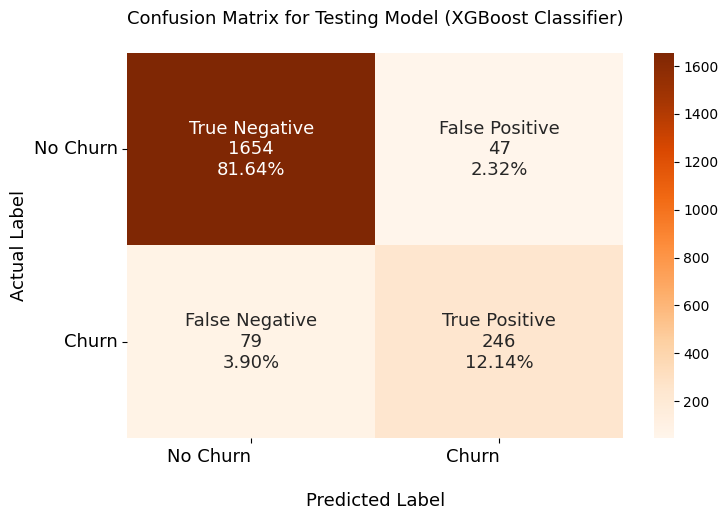

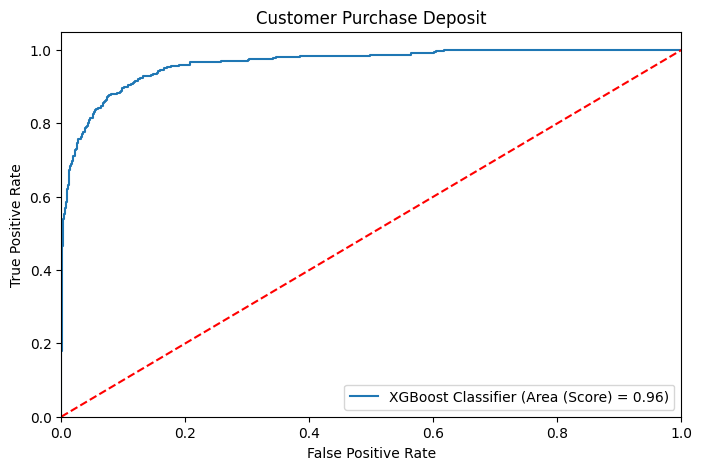

In [ ]:
model_eval_test(best_model, best_model_name, X_test, y_test)

In [ ]:
acc_best_train=round(best_model.score(X_train,y_train)*100,2)
acc_best_test=round(best_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_best_train))
print("Test Accuracy: {} %".format(acc_best_test))

Training Accuracy: 99.71 %
Test Accuracy: 93.78 %


**Feature Importance**

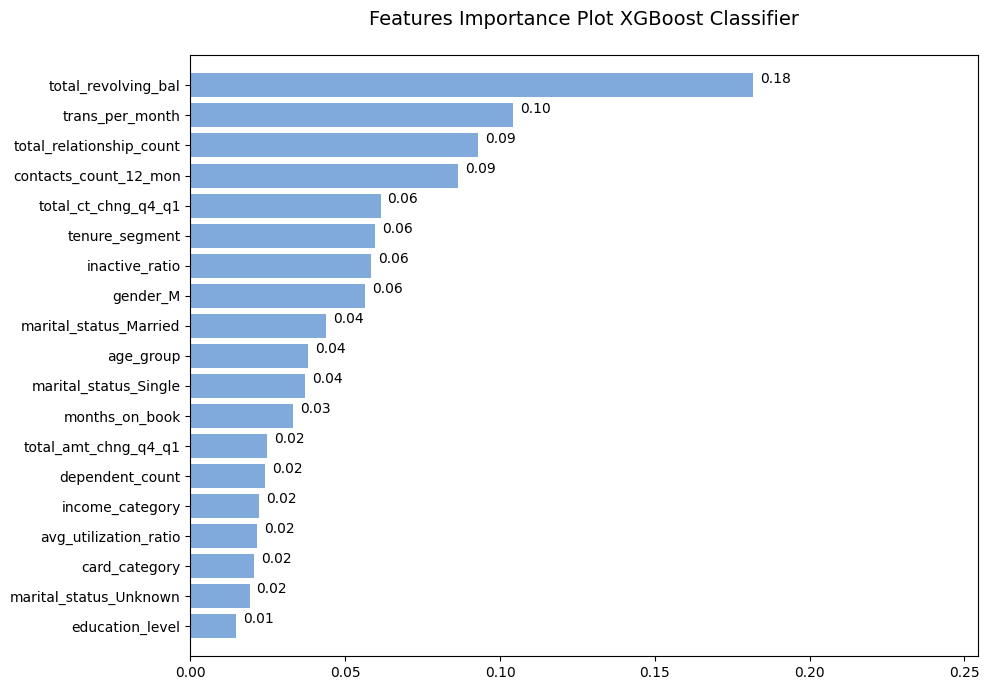

In [ ]:
feature_importance_plot(best_model, best_model_name, X_train)

In [ ]:
ft_imp = best_model.feature_importances_
importances = pd.Series(ft_imp, index=X_train.columns).sort_values(ascending=False)
importances

,0
total_revolving_bal,0.181683
trans_per_month,0.104213
total_relationship_count,0.092928
contacts_count_12_mon,0.086329
total_ct_chng_q4_q1,0.061418
tenure_segment,0.059761
inactive_ratio,0.058325
gender_M,0.056360
marital_status_Married,0.043699
age_group,0.037985


**Observation**

Berdasarkan hasil **feature importance** dari model XGBoost, berikut adalah **10 variabel teratas** yang paling berpengaruh terhadap prediksi **customer churn**, beserta interpretasi bisnisnya:

1. **total_revolving_bal**

    Total saldo kredit yang masih berputar (belum dibayar) merupakan faktor paling dominan.
    - Semakin besar saldo revolving yang dimiliki nasabah, semakin besar pengaruhnya terhadap probabilitas churn.
    - Nasabah dengan beban kredit tinggi cenderung mengalami tekanan finansial atau ketidaknyamanan terhadap produk, sehingga berpotensi berhenti menggunakan layanan.

2. **trans_per_month**

    Jumlah transaksi rata-rata per bulan menunjukkan tingkat aktivitas customer.
    - Semakin sering nasabah bertransaksi, semakin kuat sinyal loyalitas atau keterlibatan terhadap produk.
    - Perubahan atau penurunan frekuensi transaksi menjadi indikator awal risiko churn.

3. **total_relationship_count**

    Jumlah total produk atau relasi yang dimiliki customer dengan perusahaan.
    - Nasabah dengan lebih banyak relasi produk cenderung lebih terikat dan memiliki switching cost yang lebih tinggi.
    - Nasabah dengan relationship count rendah lebih rentan terhadap churn.

4. **contacts_count_12_mon**

    Jumlah kontak customer dengan pihak bank dalam 12 bulan terakhir.
    - Frekuensi kontak yang tinggi dapat mengindikasikan adanya masalah, keluhan, atau kebutuhan layanan.
    - Nasabah yang sering menghubungi layanan berpotensi memiliki tingkat ketidakpuasan yang lebih tinggi.

 5. **gender_M**

    Jenis kelamin Nasabah memberikan kontribusi terhadap pola churn.
    - Perbedaan perilaku finansial dan penggunaan produk antar gender memengaruhi kecenderungan churn.
    - Variabel ini bersifat segmentatif dan perlu ditafsirkan bersama fitur lain, bukan sebagai faktor tunggal.

6. **inactive_ratio**

    Rasio bulan tidak aktif dalam periode tertentu.
    - Semakin tinggi tingkat ketidakaktifan customer, semakin besar kemungkinan customer akan churn.
    - Variabel ini menjadi indikator perilaku disengagement yang kuat.

7. **total_ct_chng_q4_q1**

    Perubahan jumlah transaksi dari Q4 ke Q1.
    - Penurunan signifikan aktivitas transaksi antar periode merupakan sinyal kuat potensi churn.
    - Customer dengan tren transaksi menurun perlu menjadi target early intervention.

8. **age_group**

    Kelompok usia customer memengaruhi pola penggunaan produk.
    - Preferensi, stabilitas finansial, dan kebutuhan layanan berbeda antar kelompok usia.
    - Beberapa segmen usia menunjukkan kecenderungan churn yang lebih tinggi dibanding segmen lainnya.

9. **marital_status_Married**

    Status pernikahan customer berkontribusi terhadap stabilitas hubungan dengan produk.
    - Customer yang sudah menikah cenderung memiliki kebutuhan finansial yang lebih kompleks dan stabil.
    - Namun, perubahan kebutuhan hidup juga dapat memicu perubahan perilaku penggunaan produk.

10. **months_on_book**

    Lama customer terdaftar sejak pertama kali menjadi nasabah.
    - Customer dengan tenure yang lebih panjang umumnya memiliki loyalitas yang lebih tinggi.
    - Customer baru dengan months_on_book rendah perlu perhatian lebih karena masih berada pada fase adaptasi.

---

**Kesimpulan Utama**

Secara umum, fitur-fitur yang paling berpengaruh terhadap churn didominasi oleh:
- **Perilaku transaksi (usage behavior)**  
- **Tingkat keterikatan customer (engagement & relationship)**  
- **Stabilitas finansial dan aktivitas kredit**

Hal ini menunjukkan bahwa churn lebih banyak dipengaruhi oleh **perubahan perilaku nasabah**, bukan semata-mata oleh faktor demografis. Oleh karena itu, strategi mitigasi churn sebaiknya difokuskan pada:
- Monitoring penurunan aktivitas transaksi,
- Deteksi dini customer yang mulai tidak aktif,
- Pengelolaan customer dengan beban kredit tinggi,
- Peningkatan engagement pada customer dengan relasi produk yang rendah.


**Shap Observation**

Shape of SHAP values for summary plot: (2026, 19)
Shape of data for summary plot: (2026, 19)


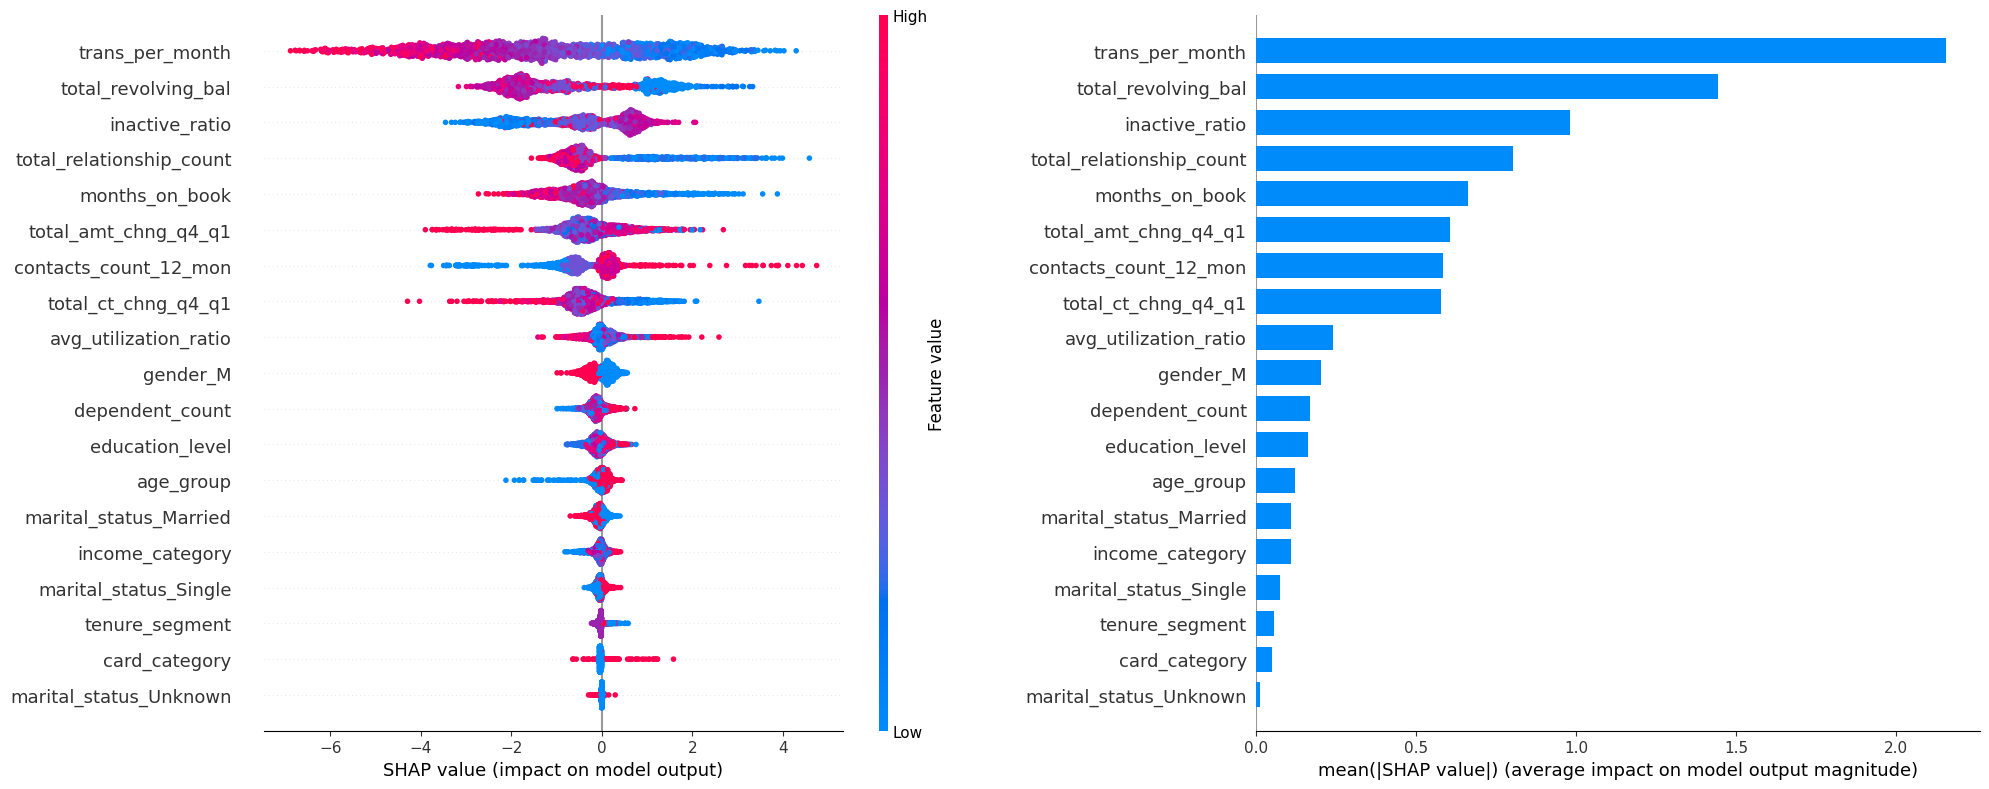

In [ ]:
shap_plot(best_model, best_model_name, X_test)

**Observation**

Berdasarkan hasil **SHAP summary plot**, dapat diidentifikasi beberapa insight utama terkait faktor-faktor yang memengaruhi **nasabah churn**, baik dari sisi **besar pengaruh** maupun **arah pengaruhnya** terhadap prediksi model.

1. **trans_per_month**
    - Feature ini memiliki **pengaruh paling dominan** terhadap output model.
    - Nilai **rendah** (warna biru) cenderung mendorong SHAP value ke arah **positif (churn)**.
    - Nilai **tinggi** (warna merah) mendorong SHAP value ke arah **negatif (tidak churn)**.
    - Artinya, **semakin jarang customer bertransaksi per bulan, semakin tinggi risiko churn**.

    ➡️ Customer dengan aktivitas transaksi rendah merupakan target utama untuk program retensi.

---

2. **total_revolving_bal**
    - Nilai **tinggi** pada saldo revolving mendorong SHAP value ke arah **positif (churn)**.
    - Customer dengan beban saldo kredit besar cenderung memiliki risiko churn lebih tinggi.
    - Sebaliknya, saldo revolving rendah relatif lebih stabil.

    ➡️ Tingginya beban kredit dapat menjadi sinyal tekanan finansial atau ketidaknyamanan terhadap produk.

---

3. **inactive_ratio**
    - Nilai **inactive_ratio tinggi** (lebih sering tidak aktif) berkontribusi kuat ke arah **churn**.
    - Customer yang jarang aktif dalam periode tertentu memiliki probabilitas churn yang jauh lebih besar.

    ➡️ Inactive ratio merupakan indikator disengagement yang sangat kuat dan cocok untuk early warning system.

---

4. **total_relationship_count**
    - Nilai **rendah** pada jumlah relasi produk mendorong prediksi ke arah **churn**.
    - Nilai **tinggi** cenderung mengurangi risiko churn.
    - Customer dengan lebih banyak produk memiliki switching cost yang lebih tinggi.

    ➡️ Strategi cross-selling dapat membantu menurunkan risiko churn.

---

5. **months_on_book**
    - Customer dengan **masa berlangganan lebih pendek** cenderung memiliki SHAP value positif (churn).
    - Customer yang sudah lama terdaftar lebih stabil dan loyal.

    ➡️ Customer baru merupakan segmen yang paling rentan churn dan membutuhkan onboarding yang kuat.

---

6. **total_amt_chng_q4_q1**
    - Penurunan nilai transaksi dari Q4 ke Q1 mendorong prediksi ke arah churn.
    - Tren penurunan aktivitas belanja menjadi sinyal penting, bukan hanya nilai absolut.

    ➡️ Monitoring tren transaksi antar periode lebih penting daripada snapshot satu waktu.

---

7. **contacts_count_12_mon**
    - Nilai tinggi pada jumlah kontak cenderung meningkatkan risiko churn.
    - Menunjukkan potensi adanya keluhan, masalah layanan, atau ketidakpuasan.

    ➡️ Customer yang sering menghubungi customer service perlu perhatian khusus.

---

8. **total_ct_chng_q4_q1**
    - Penurunan jumlah transaksi antar periode meningkatkan peluang churn.
    - Konsisten dengan pola pada perubahan total amount transaksi.

    ➡️ Konsistensi aktivitas lebih penting dibanding volume semata.

---

9. **avg_utilization_ratio**
    - Utilisasi kredit yang tinggi cenderung meningkatkan risiko churn.
    - Customer dengan pemakaian mendekati limit lebih rentan mengalami financial stress.

    ➡️ Perlu strategi pengelolaan limit atau edukasi penggunaan kredit.

---

10. **gender_M**
    - Perbedaan pola perilaku antara gender memengaruhi prediksi churn.
    - Namun kontribusinya relatif lebih kecil dibanding fitur perilaku transaksi.

    ➡️ Faktor demografis bersifat pendukung, bukan faktor utama churn.

---

**Kesimpulan Utama SHAP**

Secara keseluruhan, **churn lebih banyak dipengaruhi oleh perubahan perilaku customer dibandingkan karakteristik demografis**.  
Faktor paling krusial meliputi:
- **Penurunan aktivitas transaksi**
- **Meningkatnya ketidakaktifan**
- **Beban kredit yang tinggi**
- **Rendahnya keterikatan produk**

Insight ini menegaskan bahwa strategi mitigasi churn sebaiknya berfokus pada:
- Deteksi dini penurunan engagement,
- Intervensi pada customer dengan aktivitas rendah,
- Program retensi berbasis perilaku, bukan hanya demografi.


## Save Pipeline Model

In [240]:
df.head(1)

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [241]:
df_pipeline = df.copy()

In [243]:
df_pipeline.head(1)

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [244]:
from sklearn.preprocessing import FunctionTransformer
# Tahap 1 Feature Engineering Pipeline

def perform_feature_engineering(df):

    df_pipeline = df.copy()

    # 1. age_group
    conditions_age = [
        (df_pipeline['customer_age'] < 30),
        (df_pipeline['customer_age'] >= 30) & (df_pipeline['customer_age'] < 45)
    ]
    choices_age = ['Young', 'Adult']
    df_pipeline['age_group'] = np.select(conditions_age, choices_age, default='Senior')

    # 2. tenure_segment
    conditions_tenure = [
        (df_pipeline['months_on_book'] < 24),
        (df_pipeline['months_on_book'] >= 24) & (df_pipeline['months_on_book'] < 48)
    ]
    choices_tenure = ['New', 'Mid']
    df_pipeline['tenure_segment'] = np.select(conditions_tenure, choices_tenure, default='Long')

    # 3. trans_per_month & amt_per_month
    df_pipeline['trans_per_month'] = df_pipeline['total_trans_ct'] / (df_pipeline['months_on_book'] + 1)
    df_pipeline['amt_per_month'] = df_pipeline['total_trans_amt'] / (df_pipeline['months_on_book'] + 1)

    # 4. utilization_status
    conditions_util = [
        (df_pipeline['avg_utilization_ratio'] < 0.3),
        (df_pipeline['avg_utilization_ratio'] >= 0.3) & (df_pipeline['avg_utilization_ratio'] < 0.7)
    ]
    choices_util = ['Low', 'Medium']
    df_pipeline['utilization_status'] = np.select(conditions_util, choices_util, default='High')

    # 5. revolving_ratio, inactive_ratio, util_gap, product_per_year
    df_pipeline['revolving_ratio'] = df_pipeline['total_revolving_bal'] / (df_pipeline['credit_limit'] + 1)
    df_pipeline['inactive_ratio'] = df_pipeline['months_inactive_12_mon'] / (df_pipeline['months_on_book'] + 1)
    df_pipeline['util_gap'] = 1 - df_pipeline['avg_utilization_ratio']
    df_pipeline['product_per_year'] = df_pipeline['total_relationship_count'] / ((df_pipeline['months_on_book'] / 12) + 1)

    return df_pipeline

# Membungkus fungsi ke dalam Transformer agar bisa masuk ke Pipeline
fe_transformer = FunctionTransformer(perform_feature_engineering)

In [245]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Pastikan list kategori lengkap dan urutannya konsisten
gender_cats = ['F', 'M']
marital_cats = ['Divorced', 'Married', 'Single', 'Unknown']

# Urutan Ordinal sesuai permintaan Anda
ord_categories = [
    ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'], # education_level
    ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],       # income_category
    ['Blue', 'Silver', 'Gold', 'Platinum'],                                           # card_category
    ['Young Adult', 'Adult', 'Senior'],                                               # age_group
    ['New', 'Mid', 'Loyal']                                                           # tenure_segment
]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(
            categories=ord_categories,
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ['education_level', 'income_category', 'card_category', 'age_group', 'tenure_segment']),

        ('onehot', OneHotEncoder(
            categories=[gender_cats, marital_cats],
            drop=['F', 'Divorced'],
            sparse_output=False
        ), ['gender', 'marital_status']),

        ('scaler', StandardScaler(), [
            'dependent_count', 'months_on_book', 'total_relationship_count',
            'contacts_count_12_mon', 'total_revolving_bal', 'total_amt_chng_q4_q1',
            'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'trans_per_month', 'inactive_ratio'
        ])
    ],
    remainder='drop'
)

In [246]:
from sklearn.pipeline import Pipeline

pipeline_final = Pipeline([
    ('feature_engineering', fe_transformer), # Fungsi FE manual Anda
    ('preprocessing', preprocessor),        # ColumnTransformer di atas
    ('model', best_model)                   # Model terbaik Anda (misal: XGB atau RF)
])

In [247]:
from sklearn import set_config

# Ubah setting agar menampilkan diagram
set_config(display='diagram')

# Panggil nama variabel pipeline kamu
pipeline_final

Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function perform_feature_engineering at 0x7ba2354c0e00>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Uneducated',
                                                                              'High '
                                                                              'School',
                                                                              'College',
                                                                              'Graduate',
                                                                              'Post-Graduate',
                                                                              'Doctorate'],
                                                                             ['Less '
                                                                              'than '
                                                                              '$40K',
                                                                              '$40K '
                                                                              '- '
                                                                              '$60K',
                                                                              '$60K '
                                                                              '- '
                                                                              '$80K',
                                                                              '$80K '
                                                                              '- '
                                                                              '$120K'...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [249]:
# ambil raw data
df_ujicoba = df.copy()
X_ujicoba = df_ujicoba.drop(columns=['attrition_flag'])

In [252]:
mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
y_ujicoba = df_ujicoba['attrition_flag'].map(mapping)

In [259]:
# train pipeline
pipeline_final.fit(X_ujicoba, y_ujicoba)

try:
    sample = X_ujicoba.head(1)
    print("Prediksi Berhasil:", pipeline_final.predict(sample))
    print("Probabilitas:", pipeline_final.predict_proba(sample)[0][1])
except Exception as e:
    print("Masih Error:", e)

# Simpan
import joblib
joblib.dump(pipeline_final, 'bank_churn_pipeline.pkl')

Prediksi Berhasil: [0]
Probabilitas: 6.5622895e-05


['bank_churn_pipeline.pkl']

# Business Insight & Recommendation - Bank Churn Prediction

### Business Insight

Berdasarkan hasil pemodelan klasifikasi churn menggunakan **XGBoost Classifier** serta analisis **feature importance dan SHAP**, diperoleh beberapa insight bisnis utama sebagai berikut:

1. **Churn sangat dipengaruhi oleh perilaku transaksi customer**, bukan sekadar karakteristik demografis.
   - Penurunan frekuensi transaksi (`trans_per_month`)
   - Peningkatan ketidakaktifan (`inactive_ratio`)
   - Penurunan aktivitas transaksi antar periode (`total_ct_chng_q4_q1`, `total_amt_chng_q4_q1`)

   Pola ini menunjukkan bahwa churn merupakan proses bertahap yang dapat dideteksi lebih awal melalui perubahan perilaku.

2. **Customer dengan beban kredit tinggi memiliki risiko churn lebih besar**.
   - Tingginya `total_revolving_bal` dan `avg_utilization_ratio` mengindikasikan tekanan finansial.
   - Customer dalam kondisi ini lebih sensitif terhadap perubahan biaya, limit, atau pengalaman layanan.

3. **Tingkat keterikatan customer (engagement) berperan besar dalam menurunkan churn**.
   - Customer dengan `total_relationship_count` tinggi dan `months_on_book` panjang cenderung lebih loyal.
   - Sebaliknya, customer baru dan yang hanya memiliki sedikit relasi produk lebih rentan churn.

4. **Frekuensi interaksi dengan customer service perlu dimonitor secara kontekstual**.
   - Nilai `contacts_count_12_mon` yang tinggi sering kali menjadi sinyal adanya masalah atau ketidakpuasan.
   - Kontak yang tidak ditangani dengan baik berpotensi mempercepat churn.

5. Faktor demografis seperti gender, usia, dan status pernikahan memiliki pengaruh, namun **bersifat sekunder** dibandingkan variabel perilaku.



### Business Recommendation

Berdasarkan insight di atas, berikut rekomendasi strategis yang dapat diterapkan oleh tim bisnis dan marketing:

#### 1. Early Warning System Berbasis Perilaku
- Gunakan model churn untuk mendeteksi:
  - Penurunan transaksi bulanan
  - Peningkatan inactive ratio
  - Penurunan aktivitas transaksi antar kuartal
- Customer yang terdeteksi lebih awal dapat menjadi target utama program retensi.

#### 2. Strategi Retensi untuk Customer Berisiko Tinggi
- Prioritaskan customer dengan:
  - Aktivitas transaksi rendah
  - Beban saldo kredit tinggi
  - Relasi produk yang minim
- Bentuk intervensi dapat berupa:
  - Penawaran personal (promo, cashback, fee adjustment)
  - Edukasi pengelolaan kredit
  - Program loyalty berbasis usage

#### 3. Fokus pada Customer Baru dan Low Engagement
- Customer dengan `months_on_book` rendah memerlukan:
  - Onboarding yang lebih kuat
  - Edukasi produk yang lebih jelas
  - Engagement awal yang konsisten

#### 4. Optimalisasi Layanan Customer Service
- Customer dengan frekuensi kontak tinggi perlu ditangani secara proaktif.
- Gunakan data churn sebagai pendukung prioritas penanganan keluhan.

#### 5. Pemanfaatan Model untuk Targeted Campaign
- Model churn dapat digunakan sebagai alat seleksi target campaign:
  - Mengurangi biaya campaign ke customer yang berpotensi churn tinggi namun sulit diselamatkan
  - Meningkatkan efektivitas campaign pada customer yang masih bisa dipertahankan


